In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'A2A.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

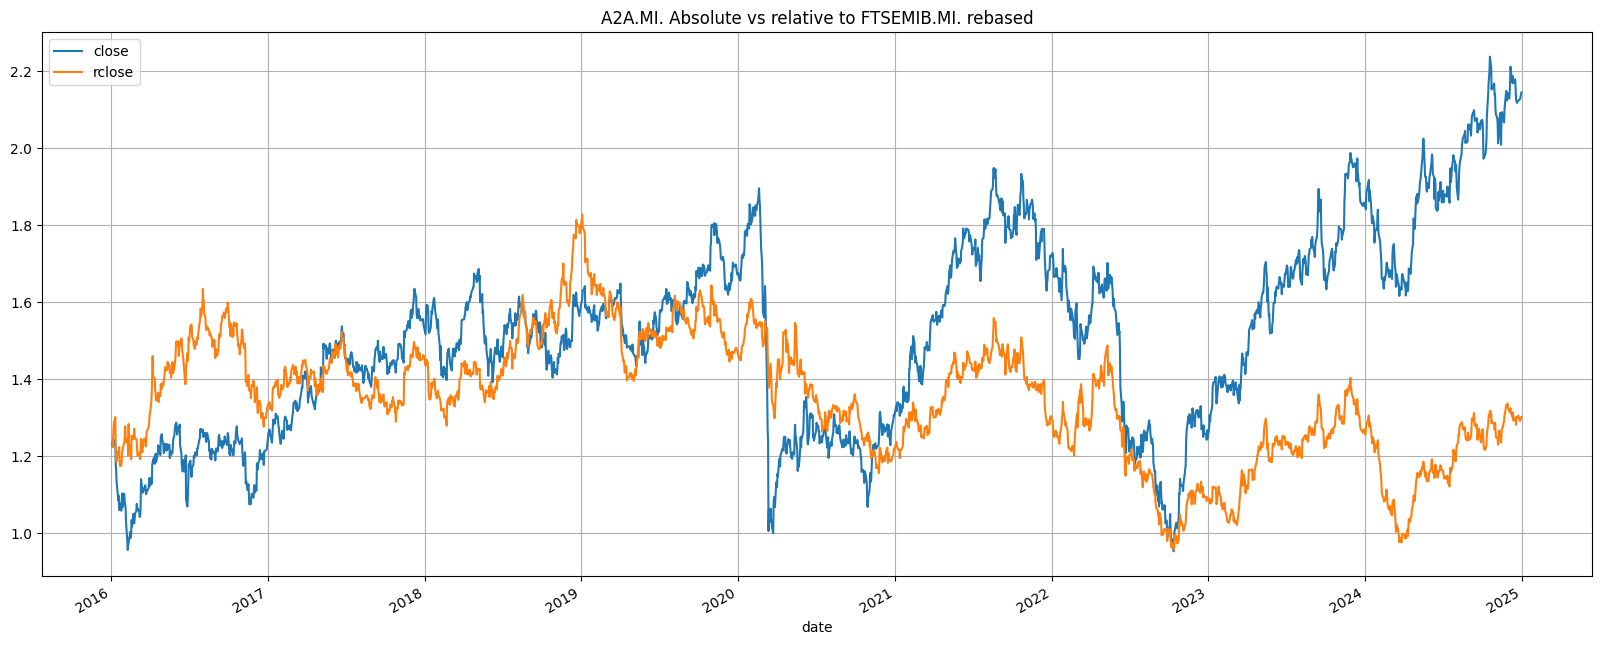

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

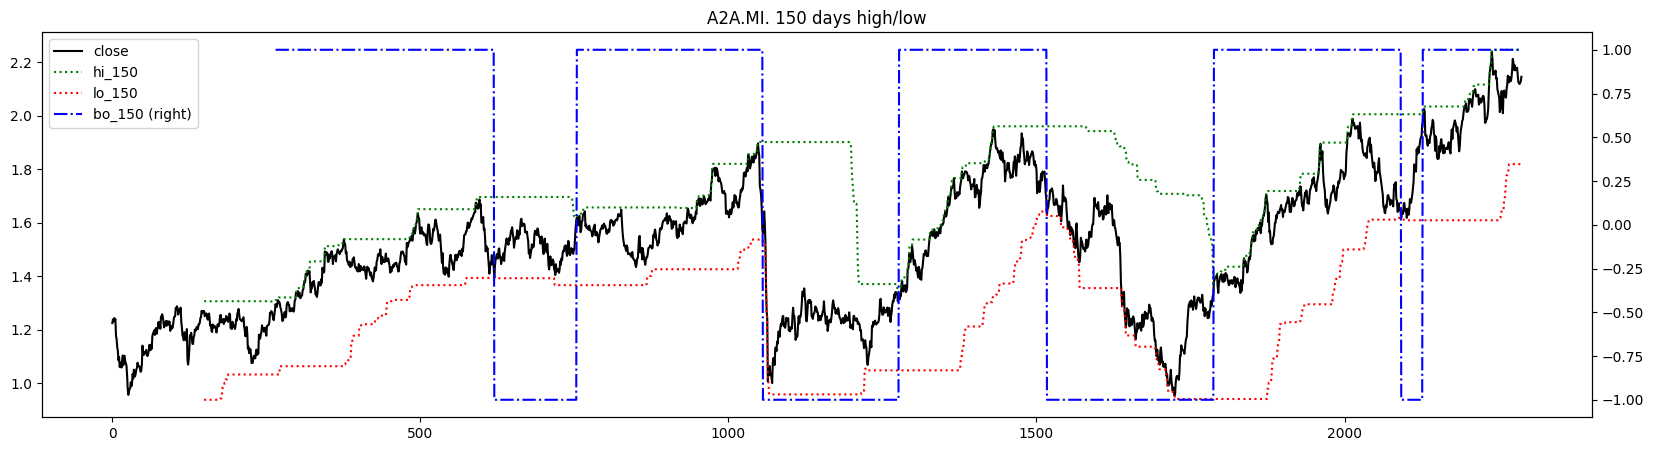

In [4]:
window_bo = 150
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

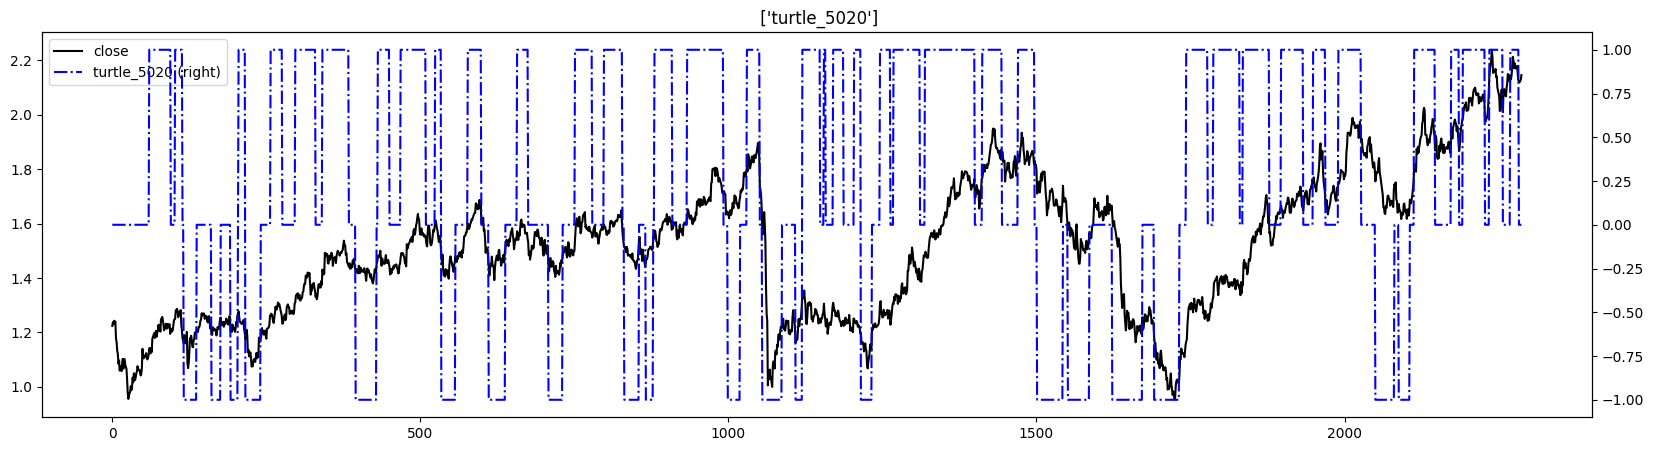

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

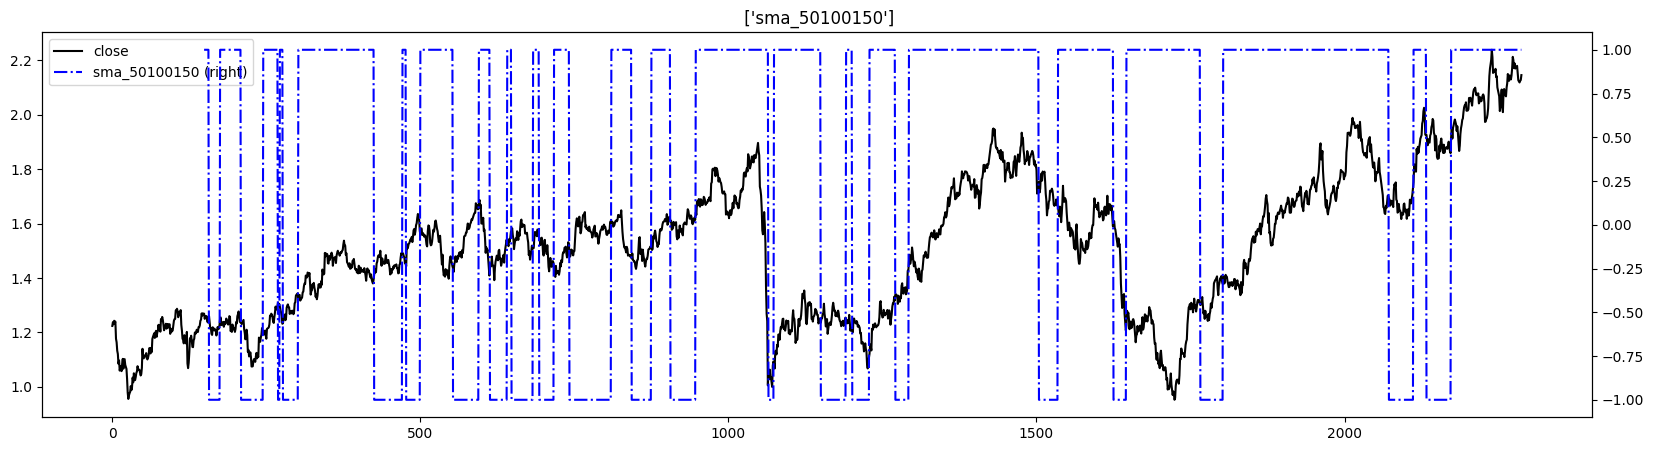

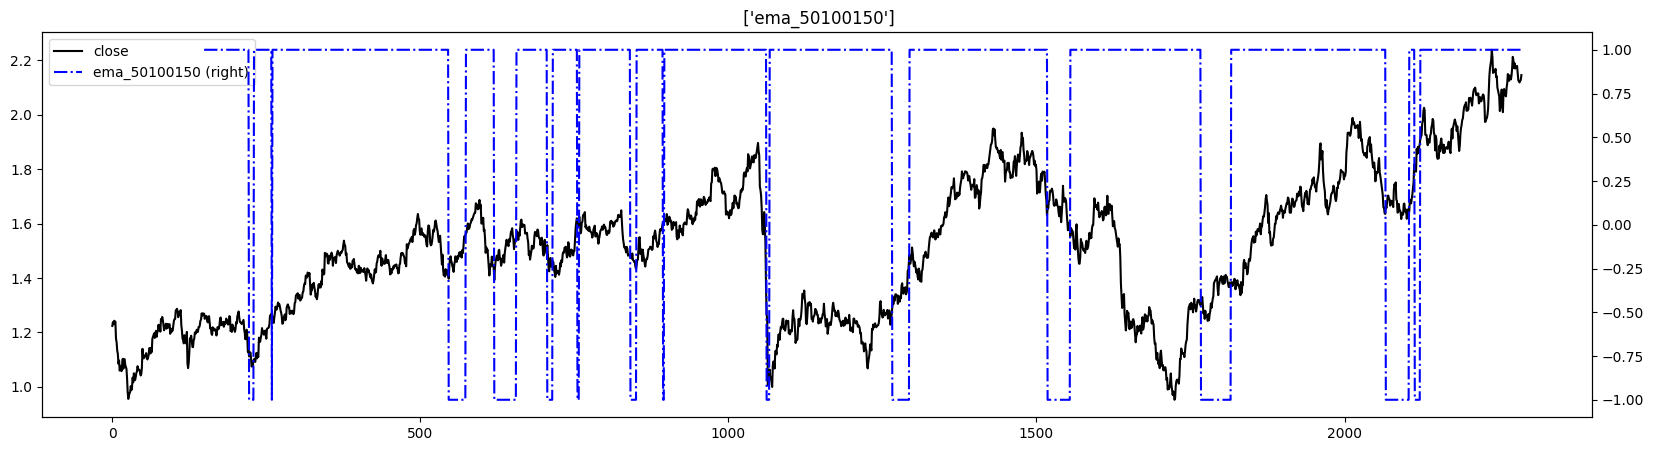

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

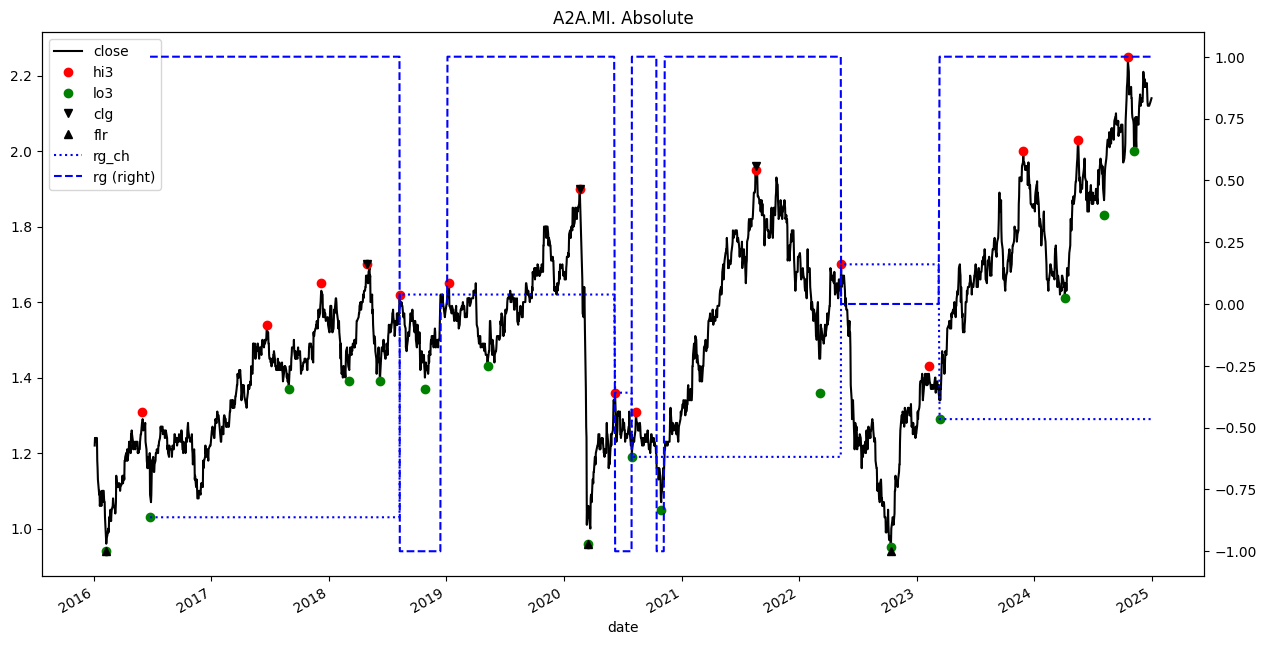

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


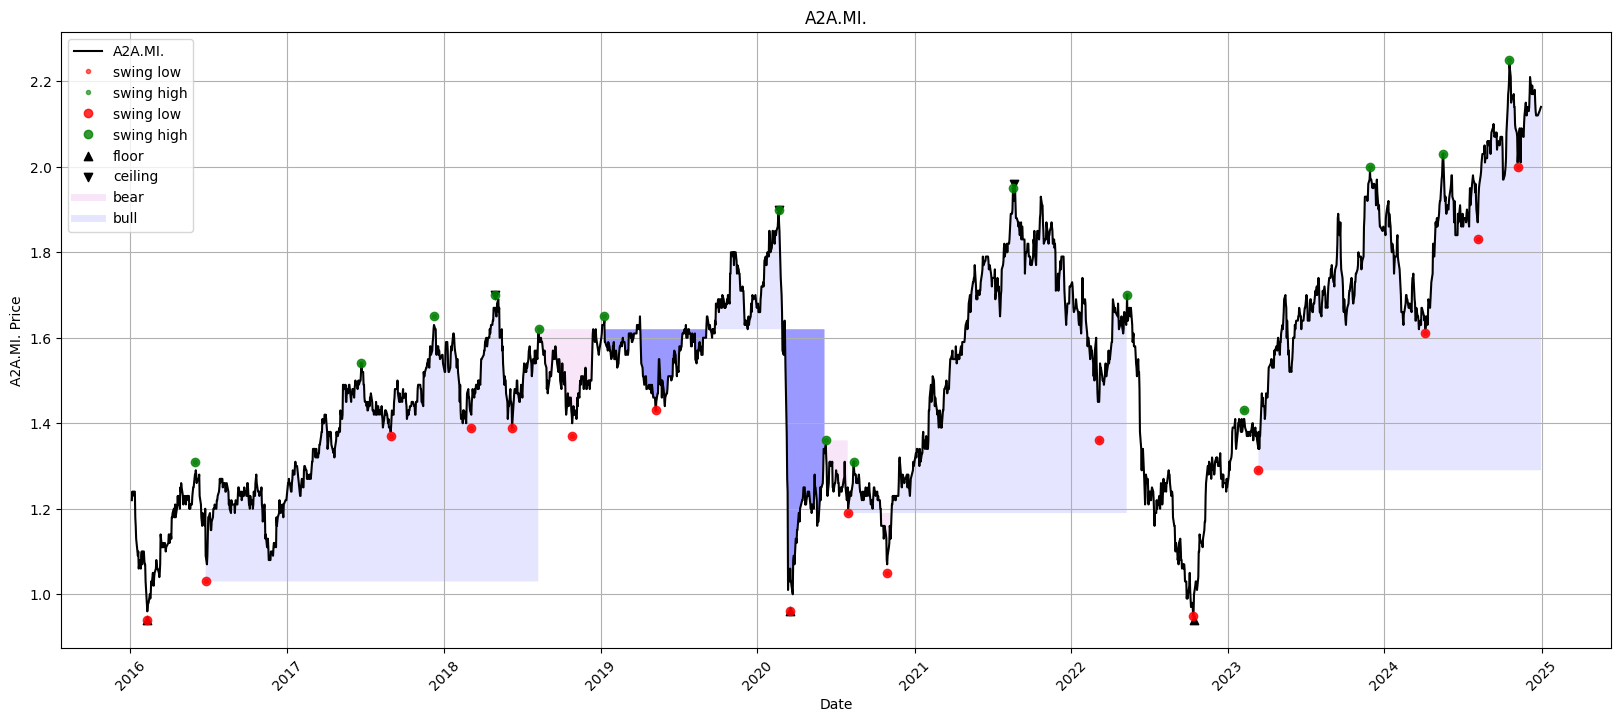

In [8]:
plot_regime_abs(df_fc, ticker)

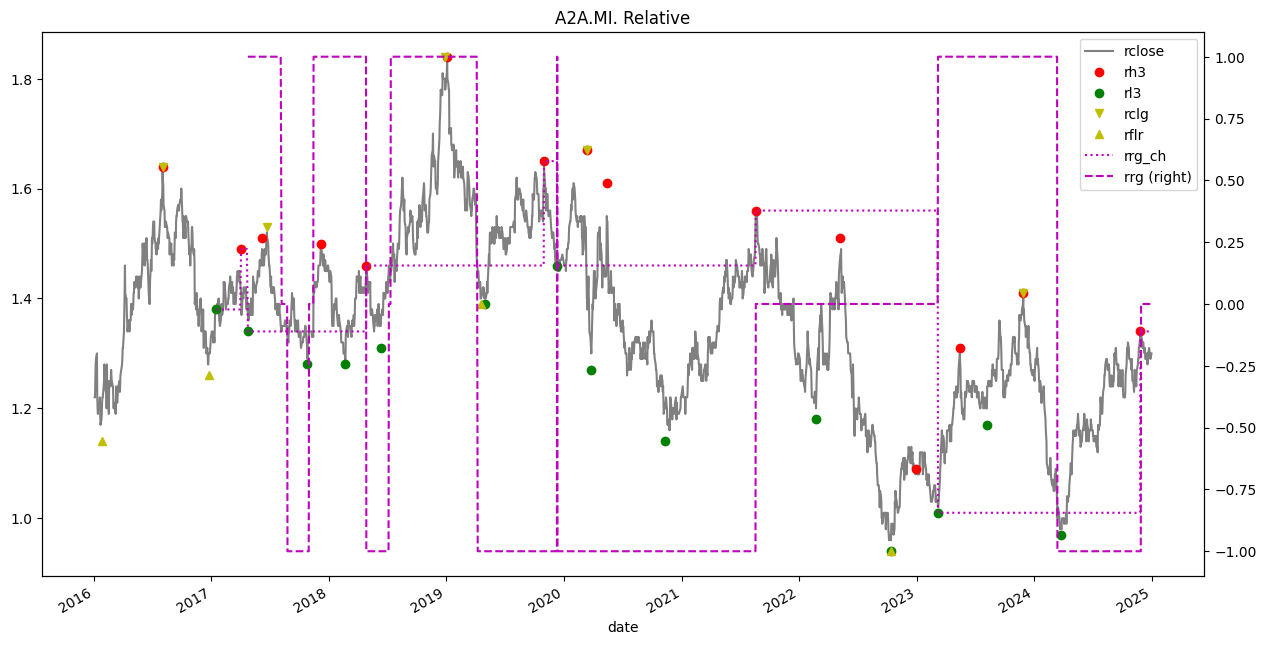

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


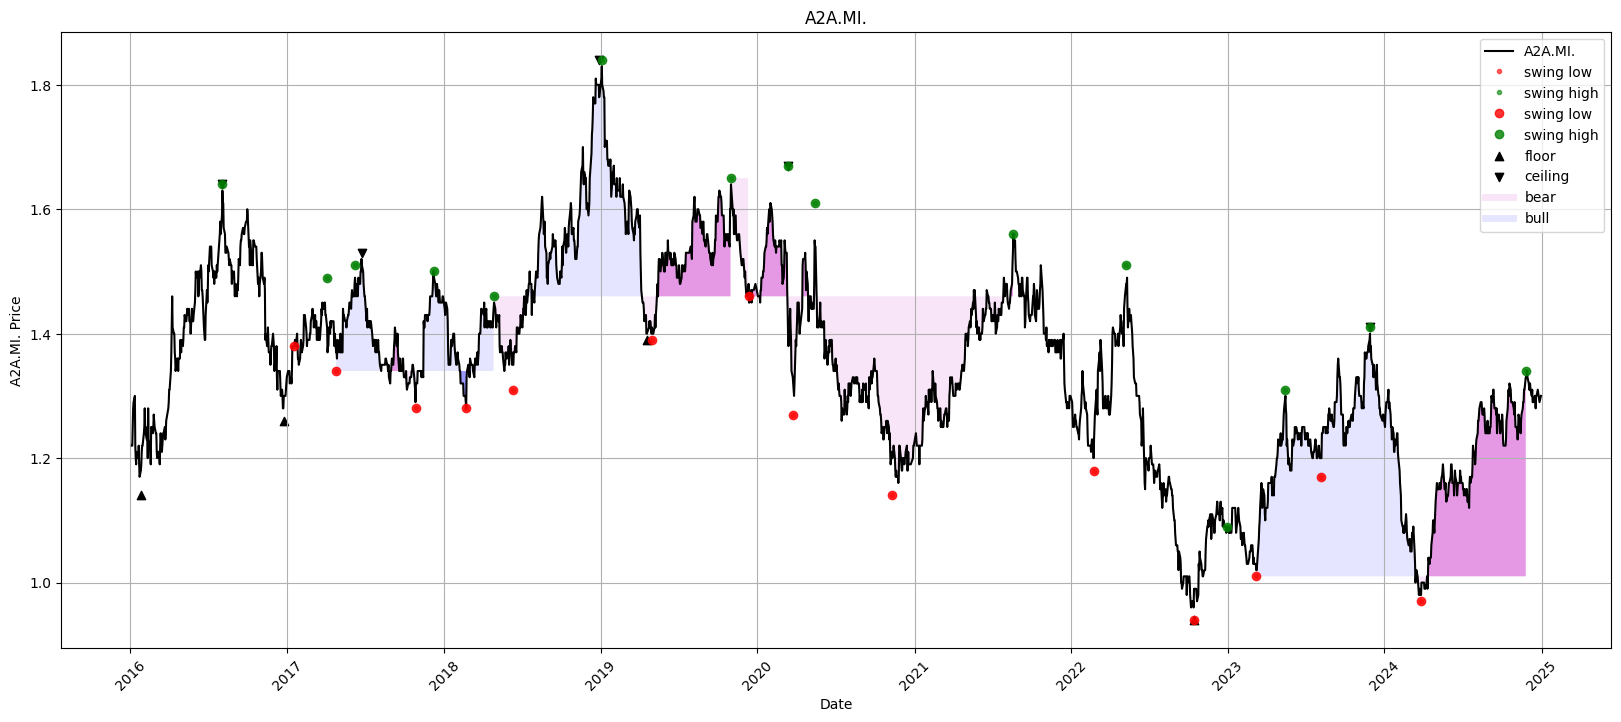

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                2.145      2.089  0.576645
ema                     2.145      2.089  0.248853
floor_ceiling           2.140      2.090  1.844008
floor_ceiling_relative  2.140      2.150 -0.190530
sma                     2.145      2.089  0.158747
turtle                  2.145      2.054  0.013777

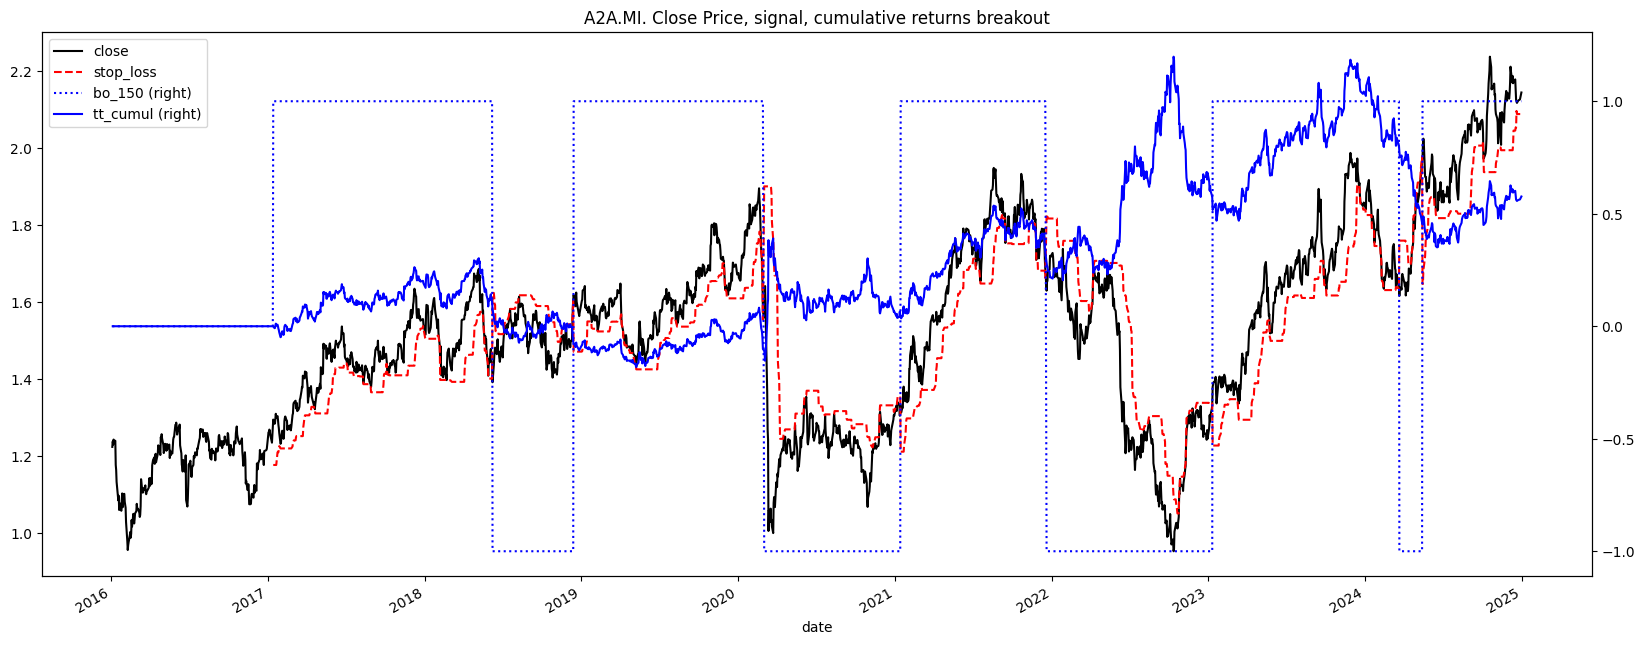

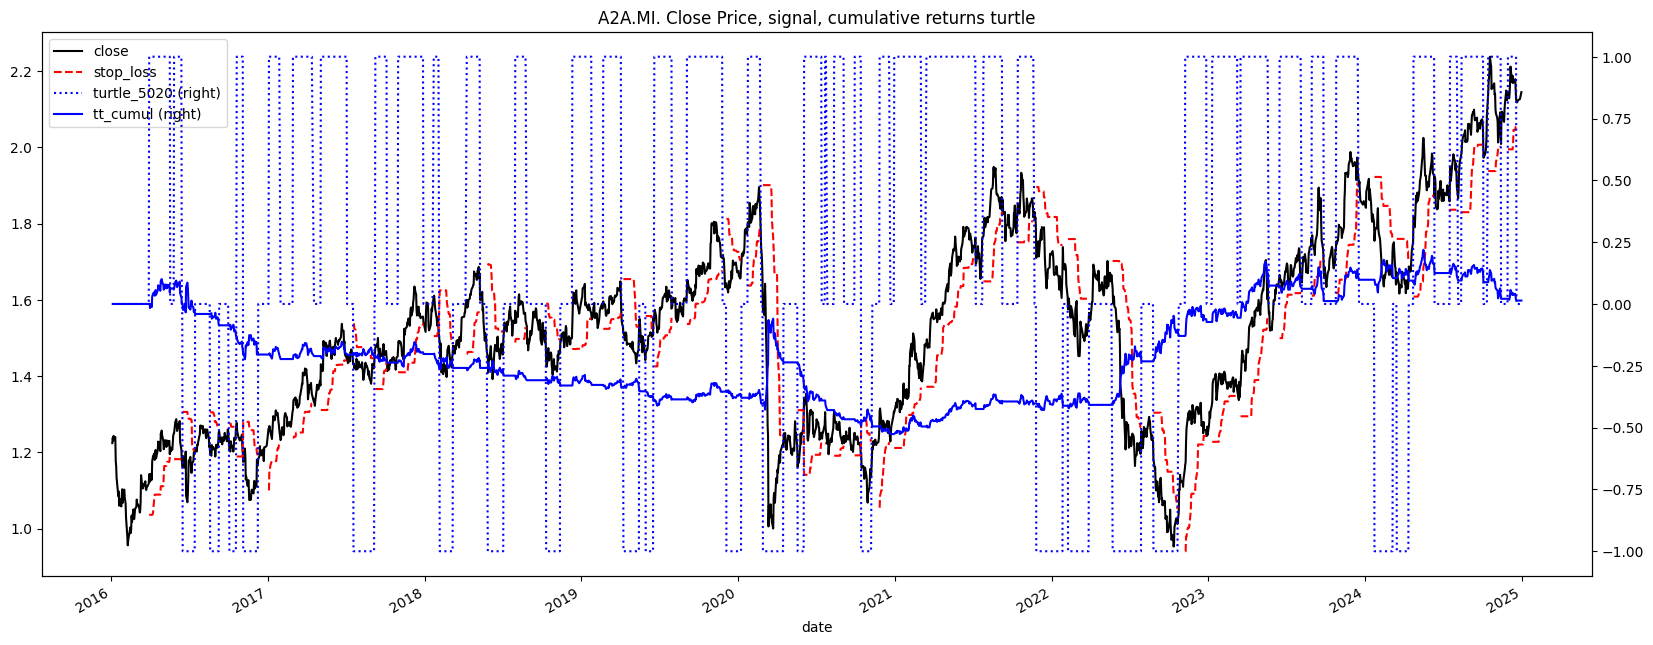

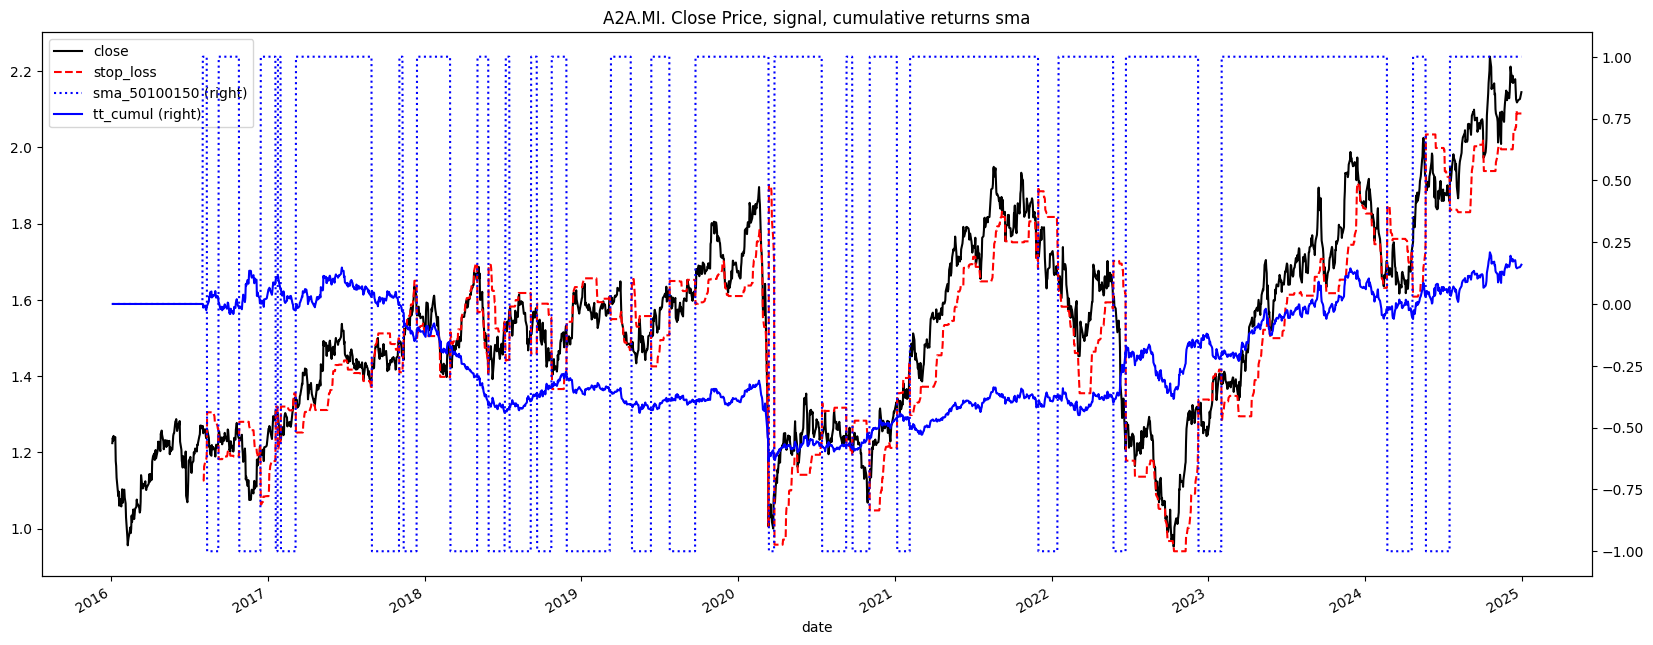

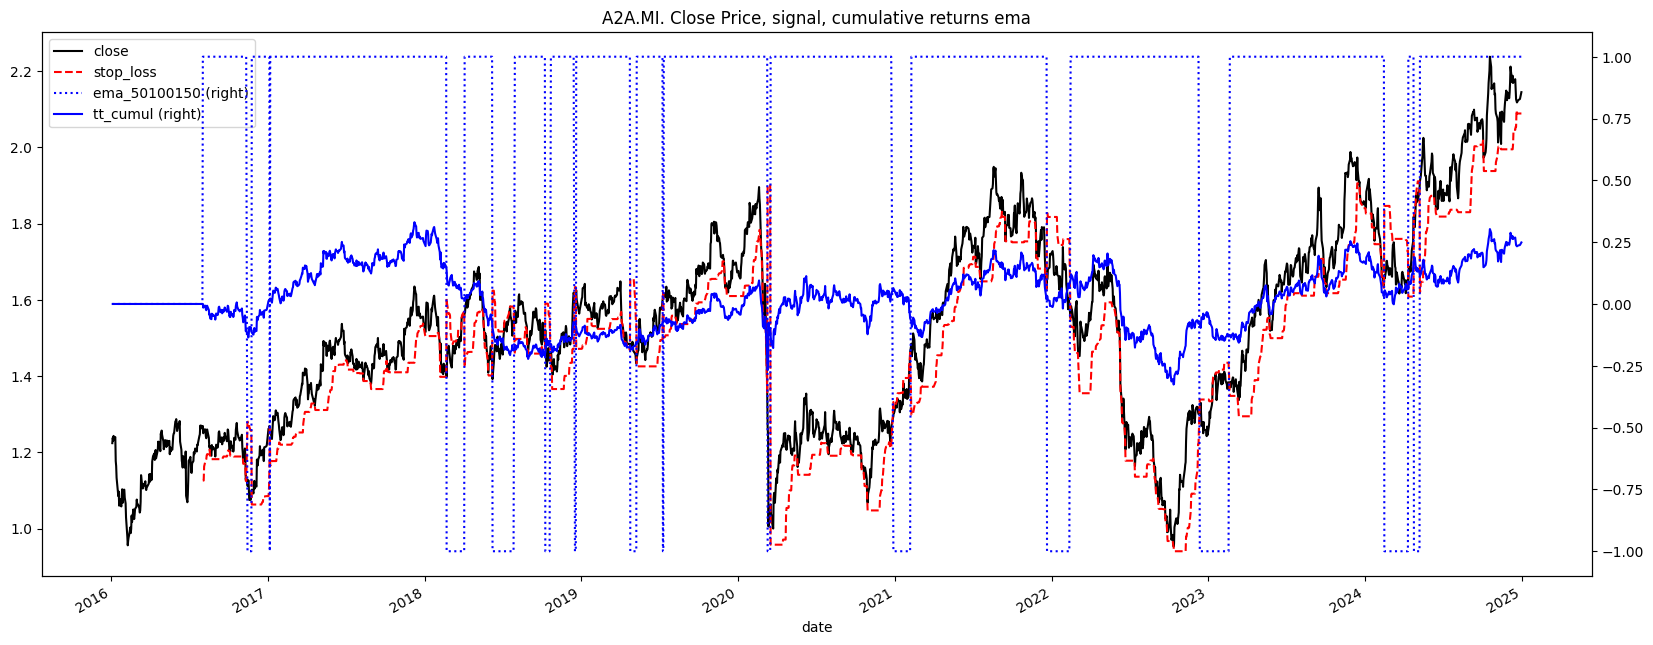

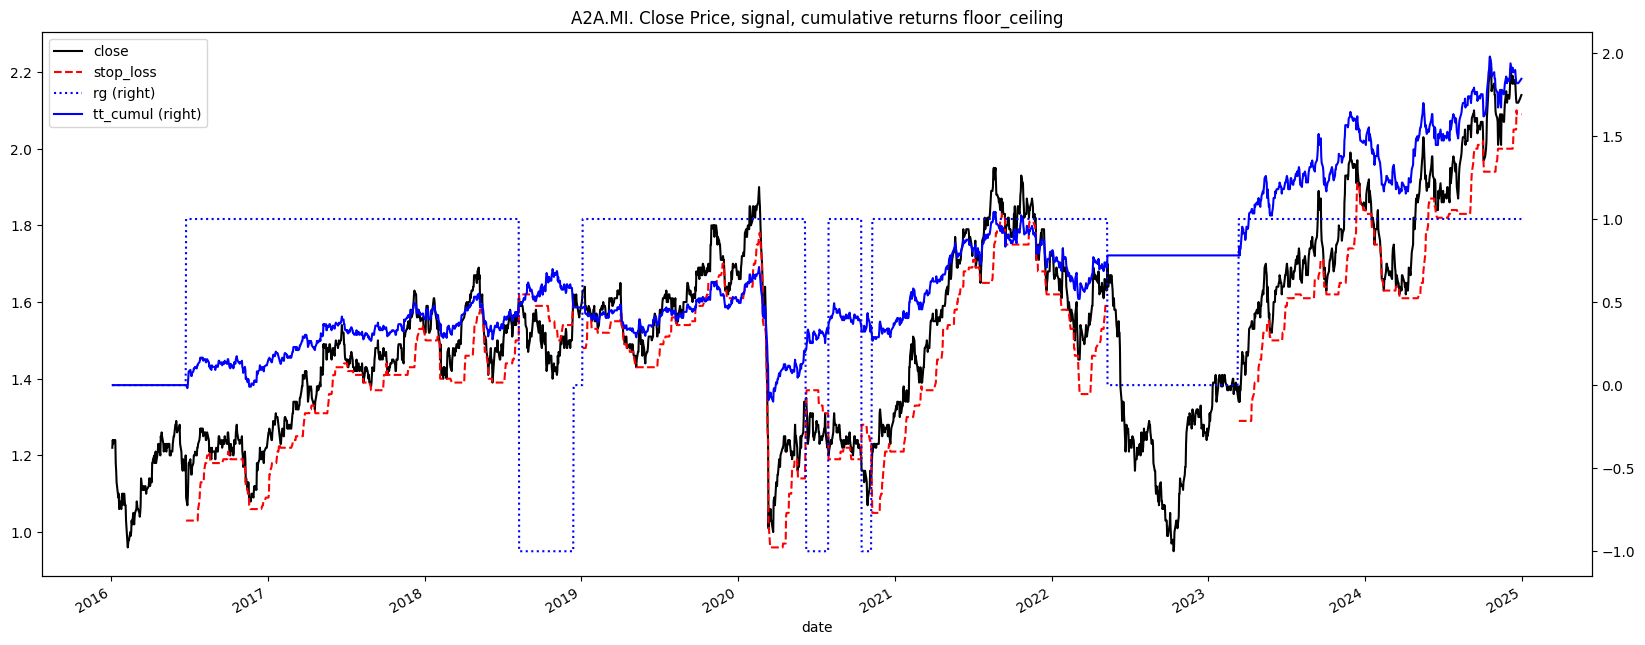

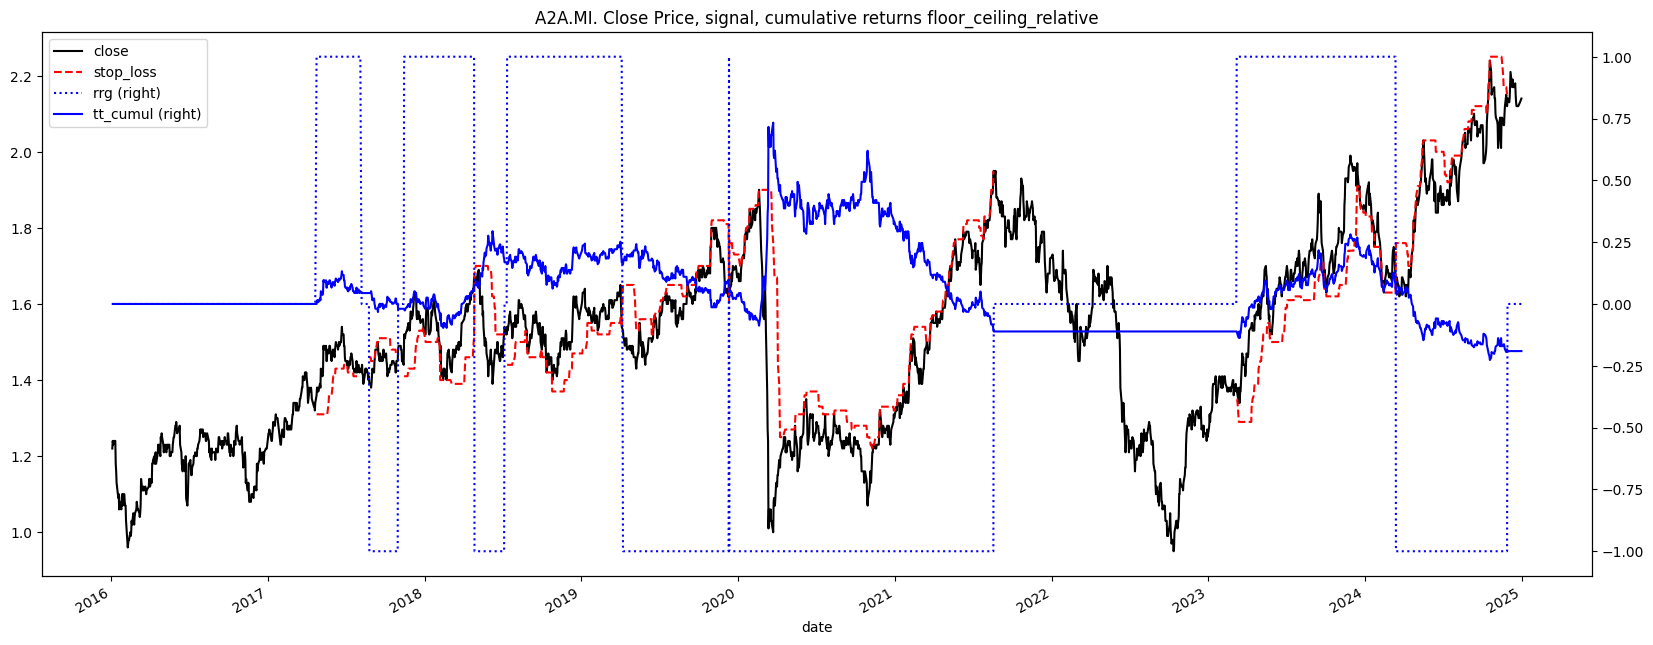

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

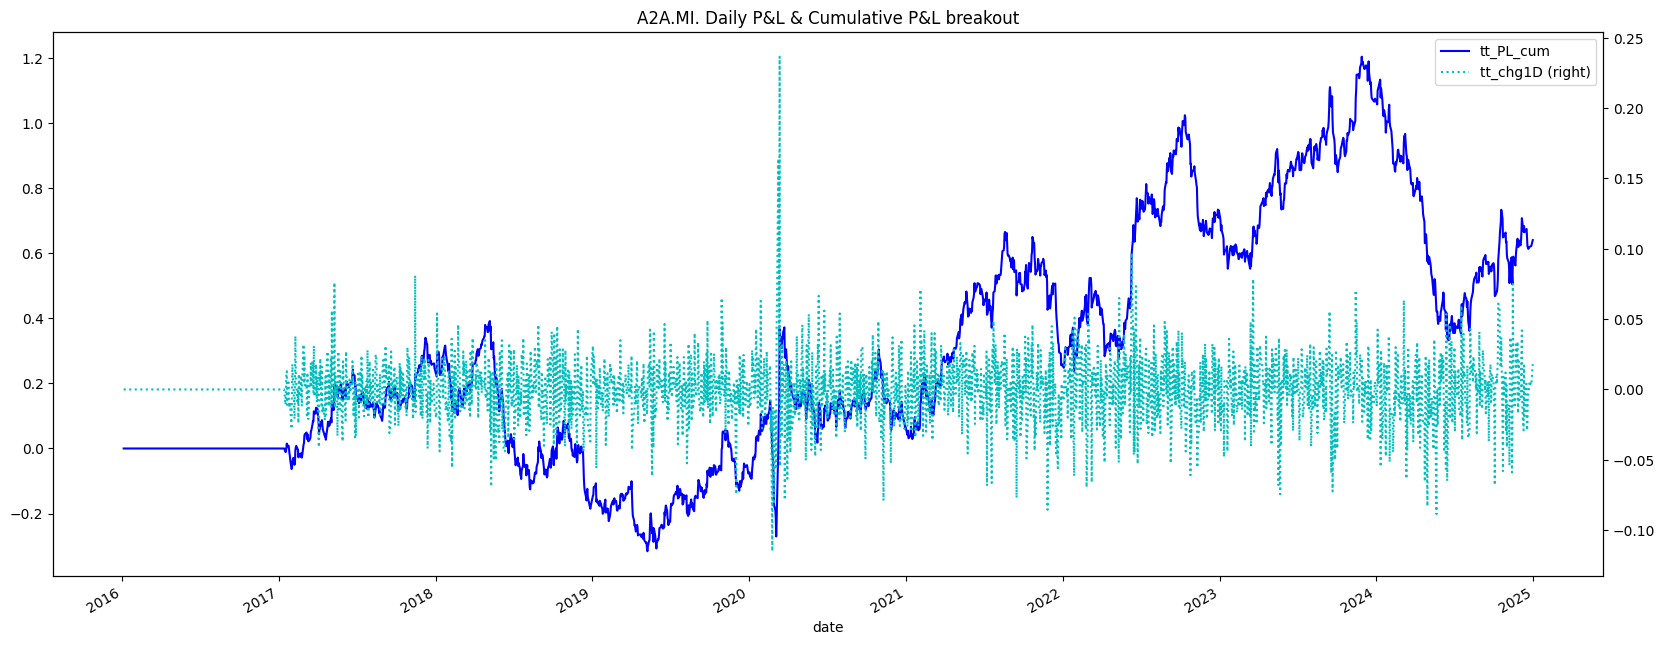

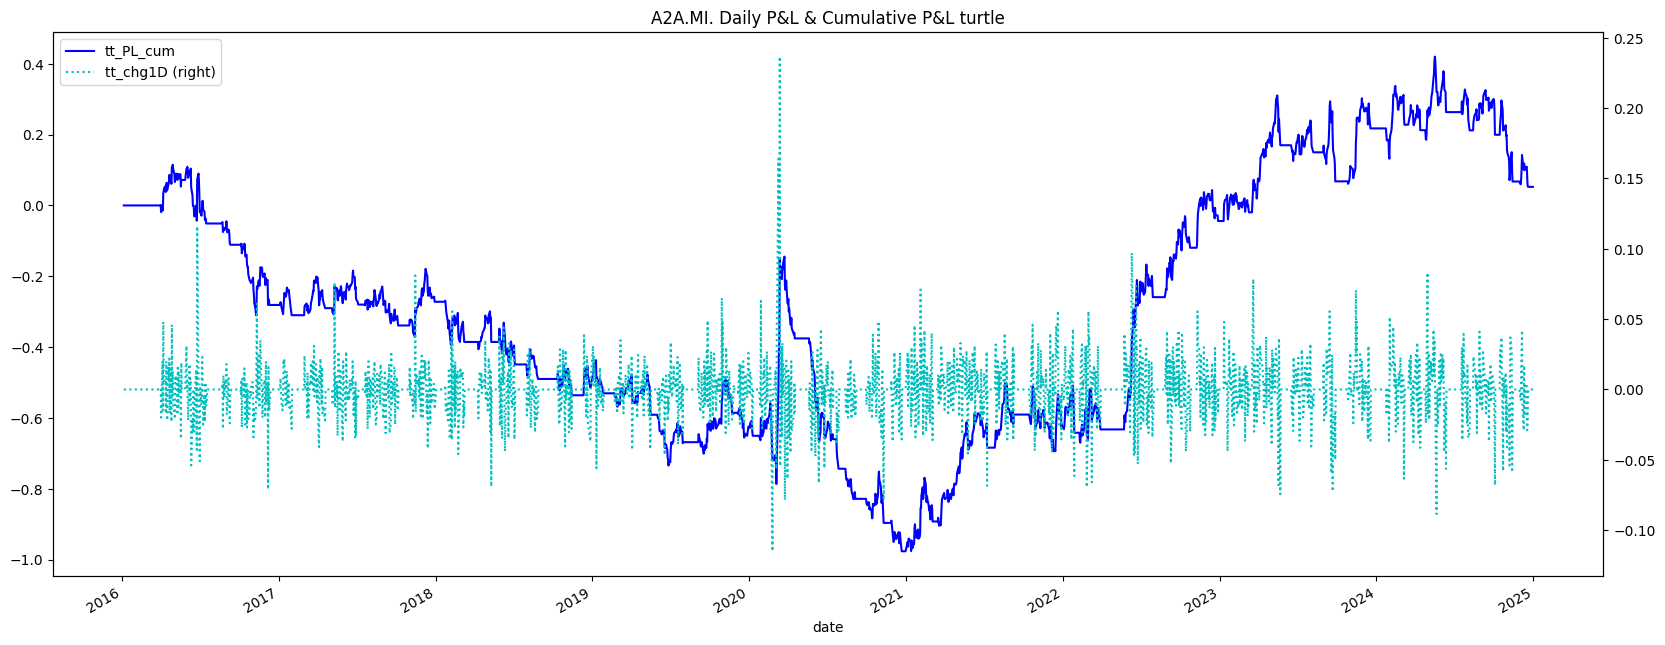

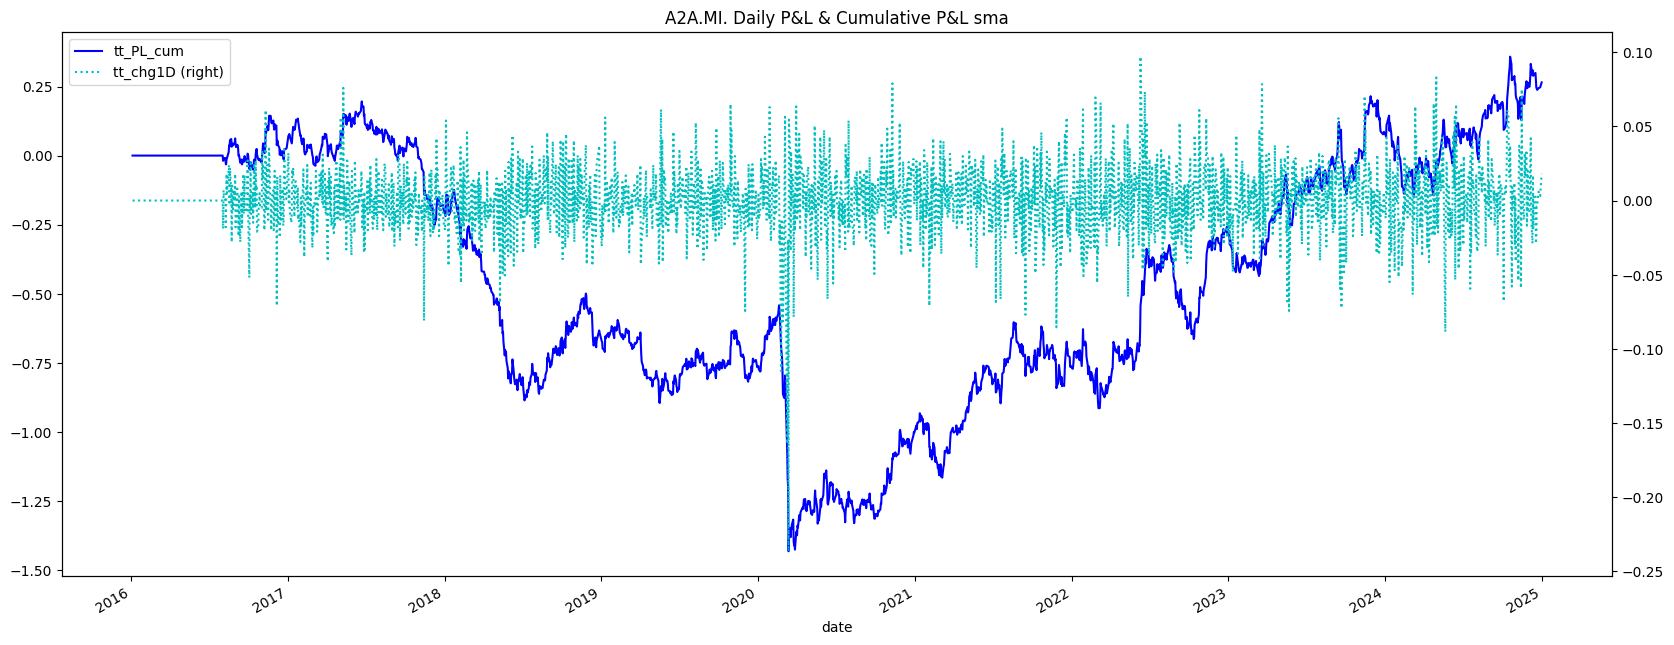

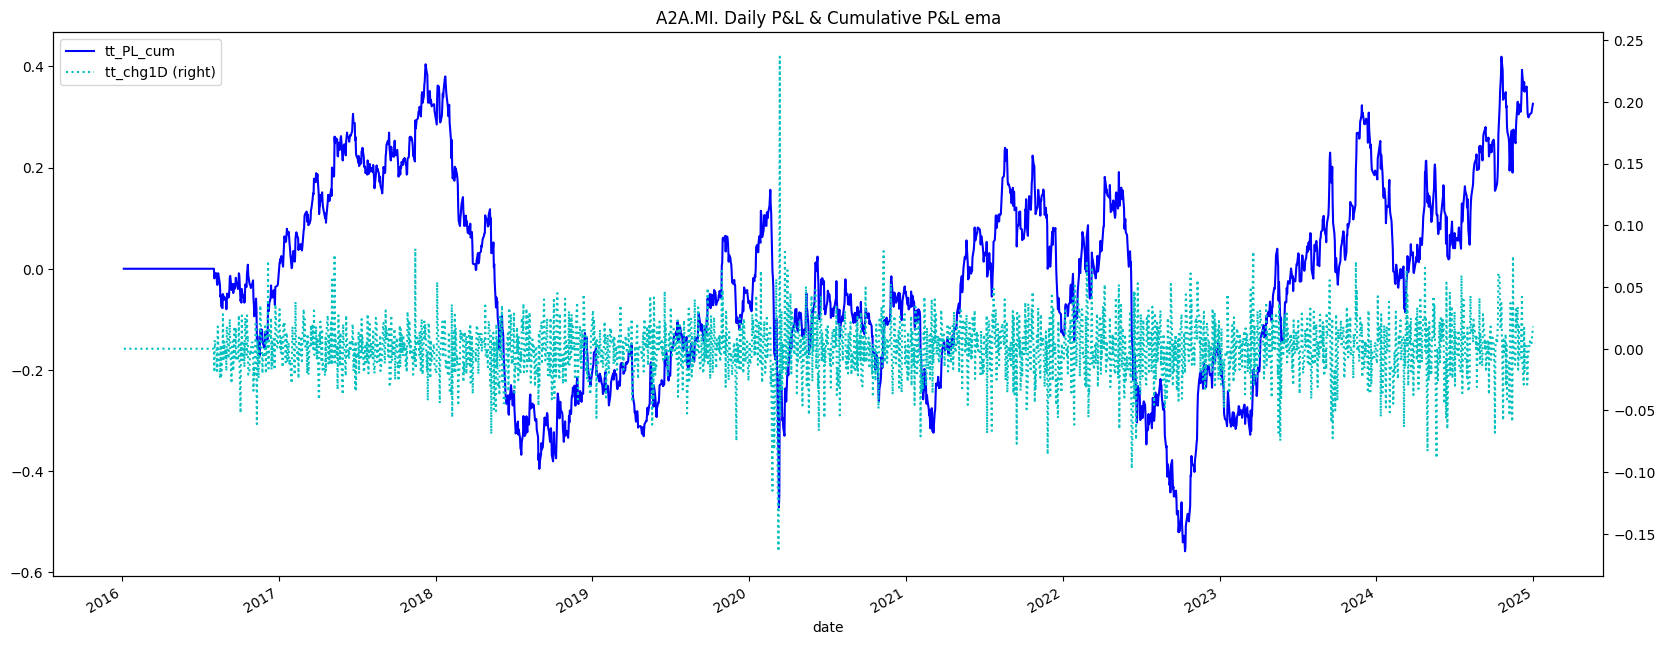

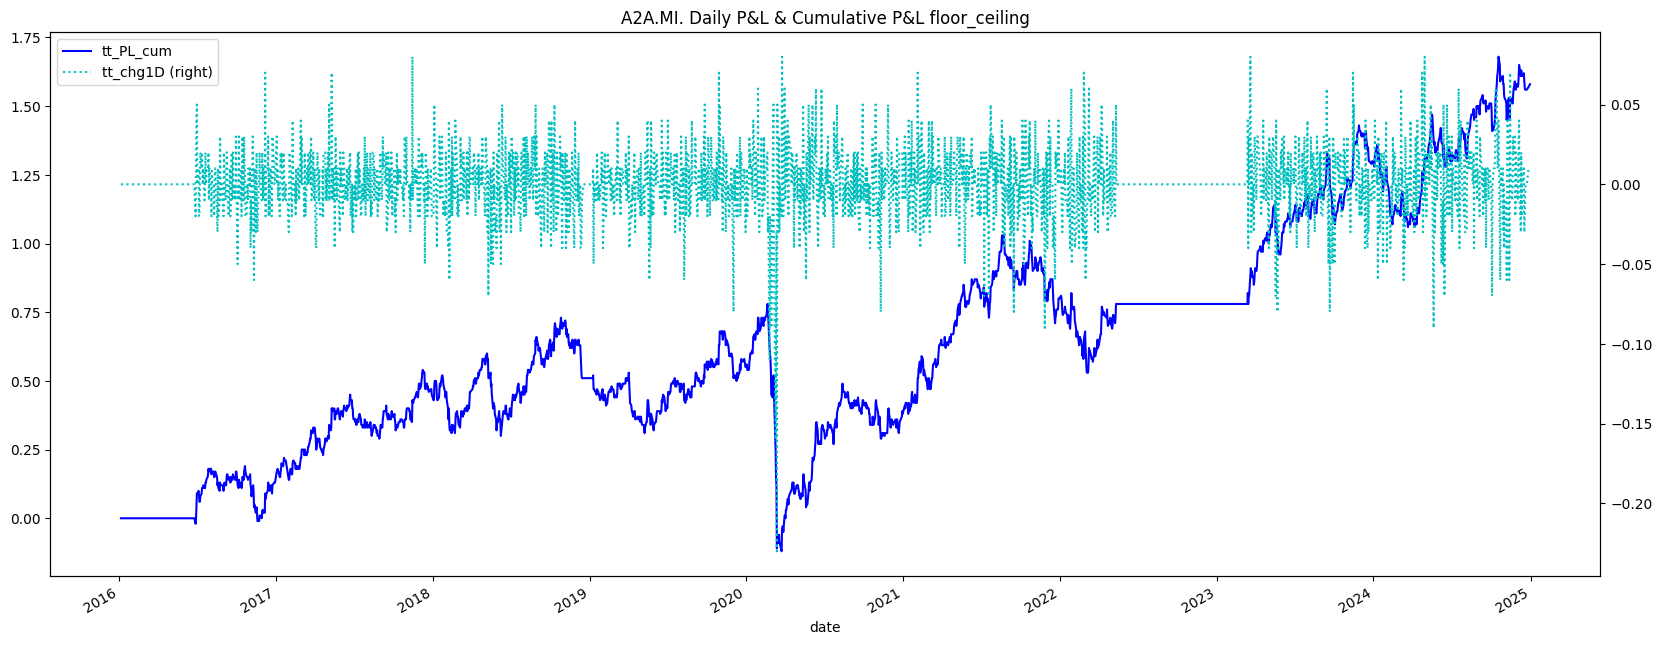

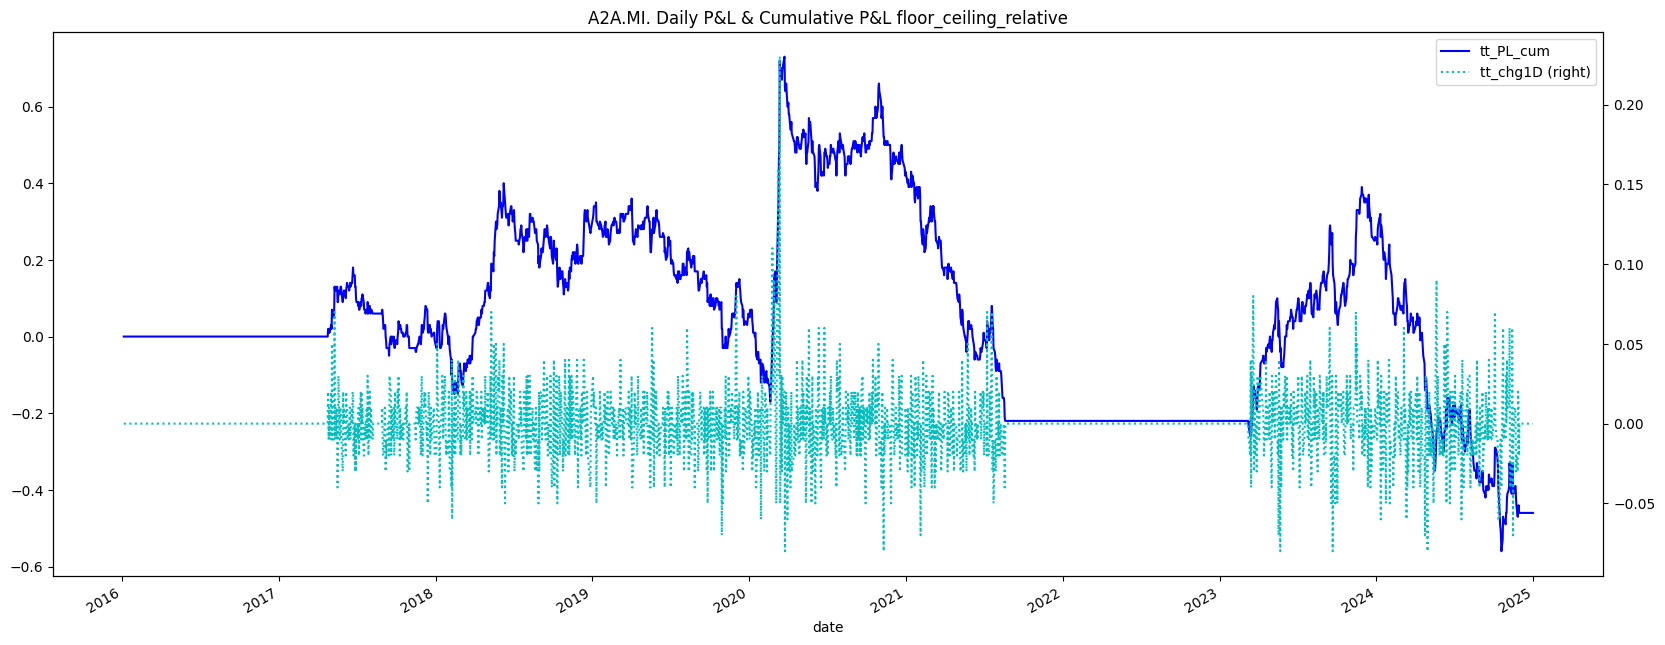

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy       kelly
method                                                                
breakout                    0.001344              0.001335   71.853368
ema                         0.001344              0.001335   71.853368
floor_ceiling               0.002186              0.002178  118.100715
floor_ceiling_relative     -0.000022             -0.000029   -1.588756
sma                         0.001344              0.001335   71.853368
turtle                      0.000529              0.000524   57.925549

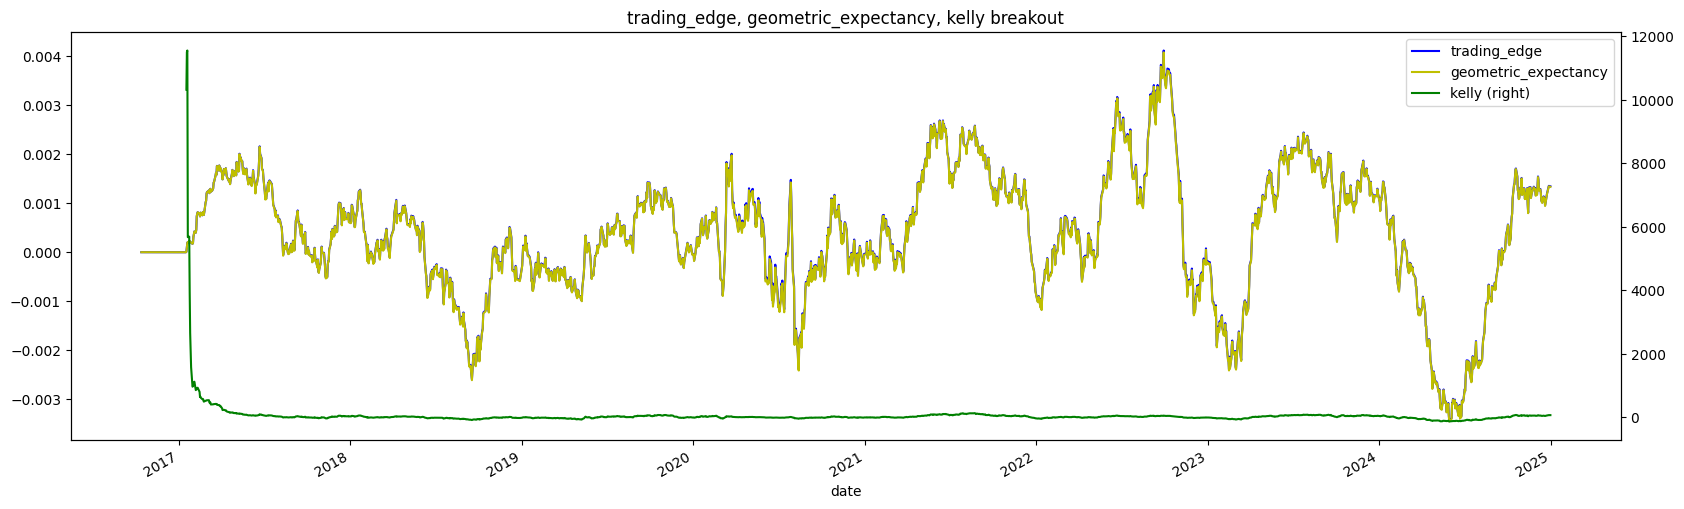

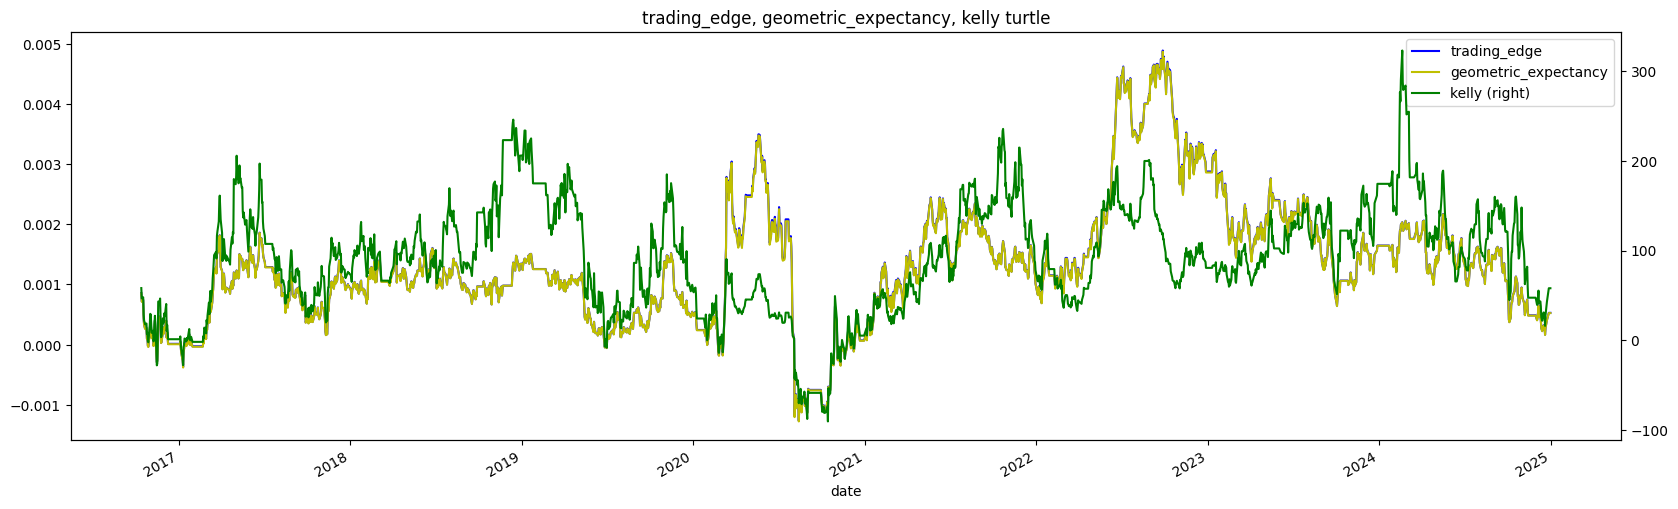

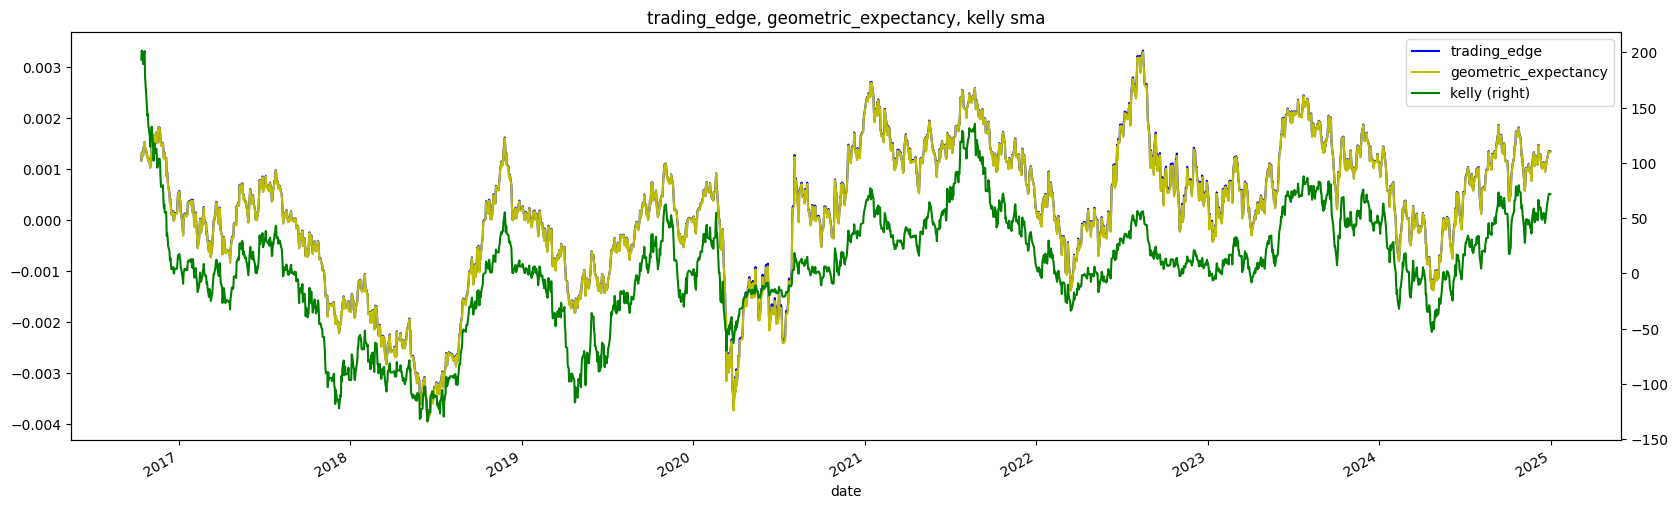

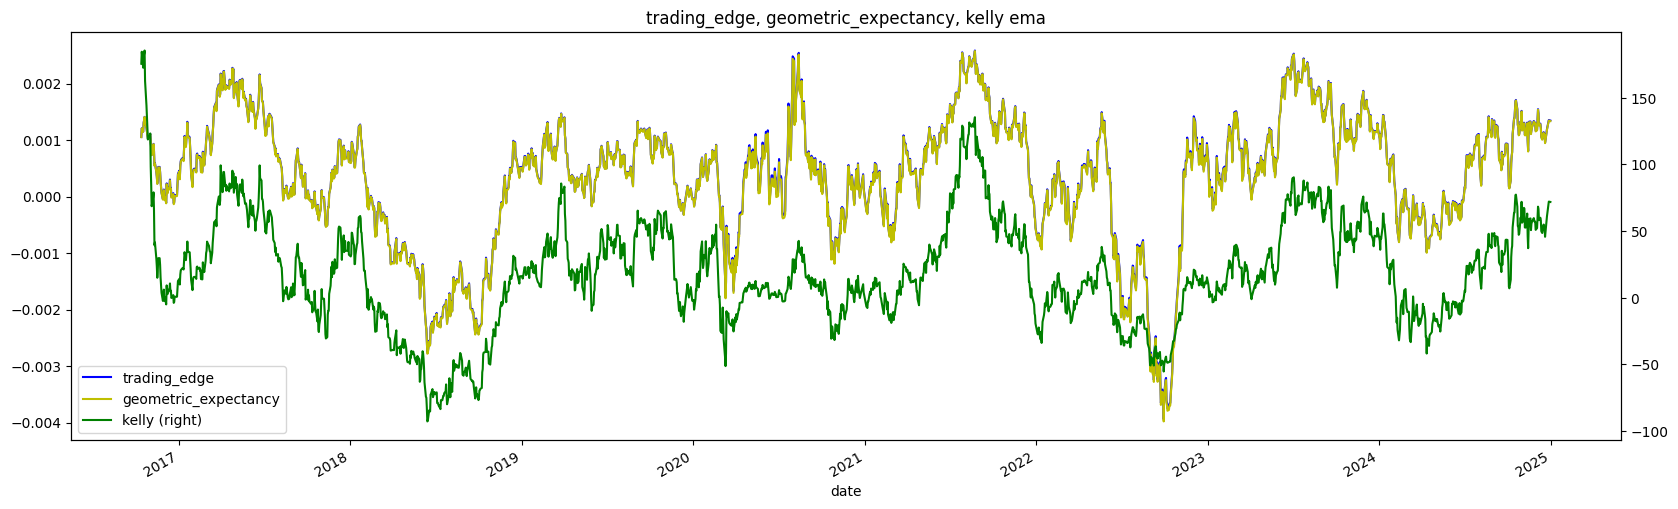

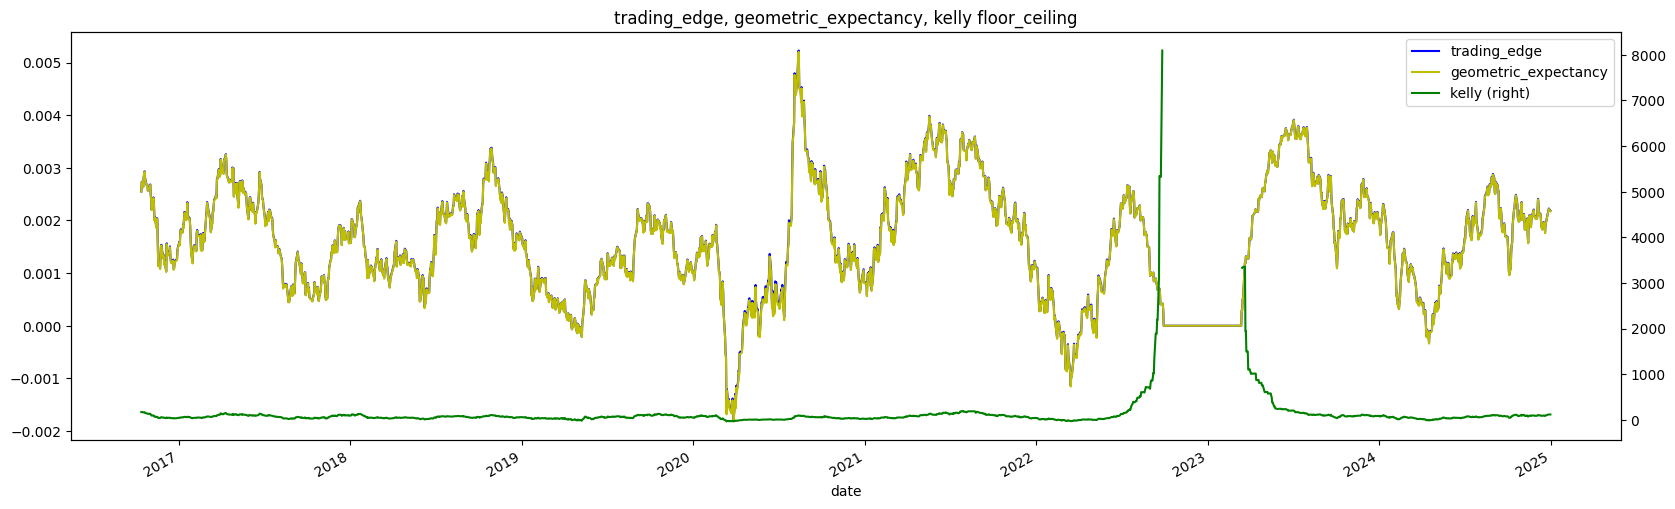

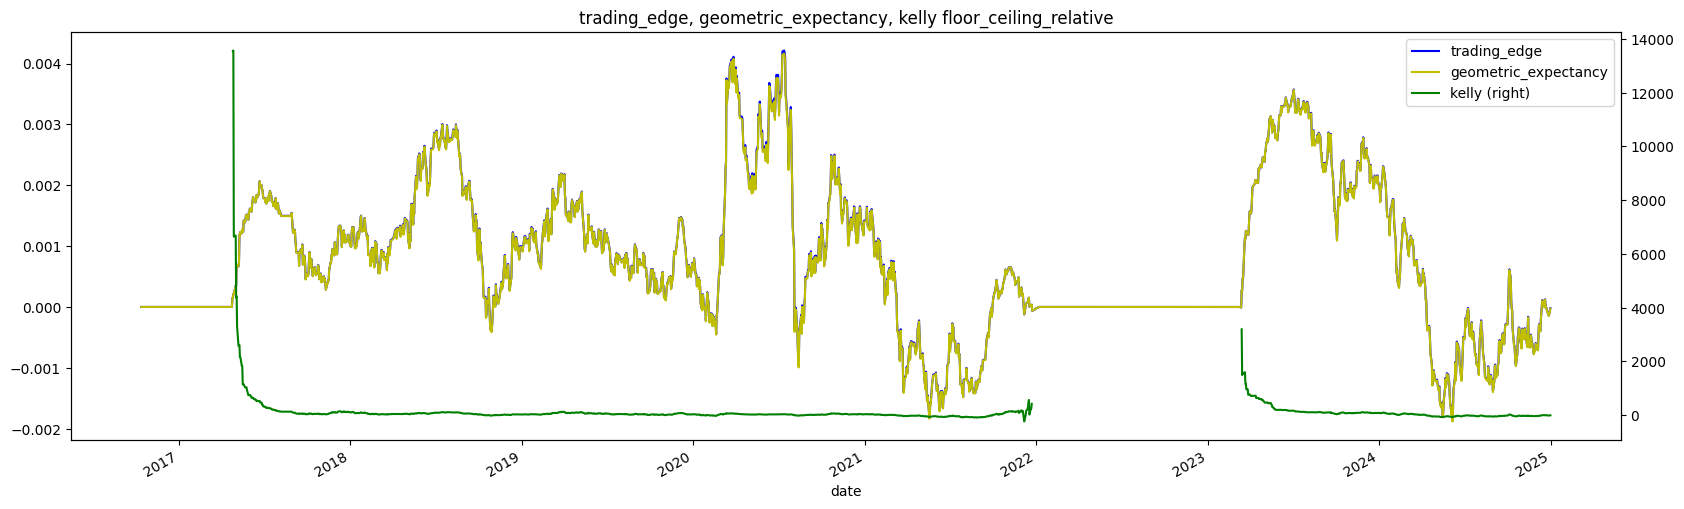

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
pd.concat(output_signals, axis=0)[['constant_risk', 'convex_risk', 'concave_risk']]

constant_risk  convex_risk  concave_risk
date                                                         
2016-01-04 08:00:00       0.006120     0.009180      0.009180
2016-01-05 08:00:00       0.006190     0.009285      0.009285
2016-01-06 08:00:00       0.006150     0.008734      0.009221
2016-01-07 08:00:00       0.006215     0.008995      0.009285
2016-01-08 08:00:00       0.006175     0.008680      0.009248
...                            ...          ...           ...
2024-12-19 08:00:00       0.010600     0.007645      0.014871
2024-12-20 08:00:00       0.010600     0.007295      0.014681
2024-12-23 08:00:00       0.010600     0.007086      0.014549
2024-12-27 08:00:00       0.010650     0.007083      0.014546
2024-12-30 16:35:16       0.010700     0.007214      0.014631

[41184 rows x 3 columns]

In [23]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                102688.000941  104032.001412  104032.001412   
ema                     101108.397484  101695.196152  101695.196152   
floor_ceiling           113551.000000  120127.000000  116308.000000   
floor_ceiling_relative   96149.000000   95410.000000   97769.000000   
sma                     100900.997925  101377.996826  101377.996826   
turtle                   99444.598544   98896.997869   98152.448261   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                102432.000852      0.640000  
ema                     101271.397114      0.325999  
floor_ceiling           106172.000000      1.580000  
floor_ceiling_relative   98444.000000     -0.460000  
sma                     101033.497620      0.264999  
turtle                   99777.798414      0.052500

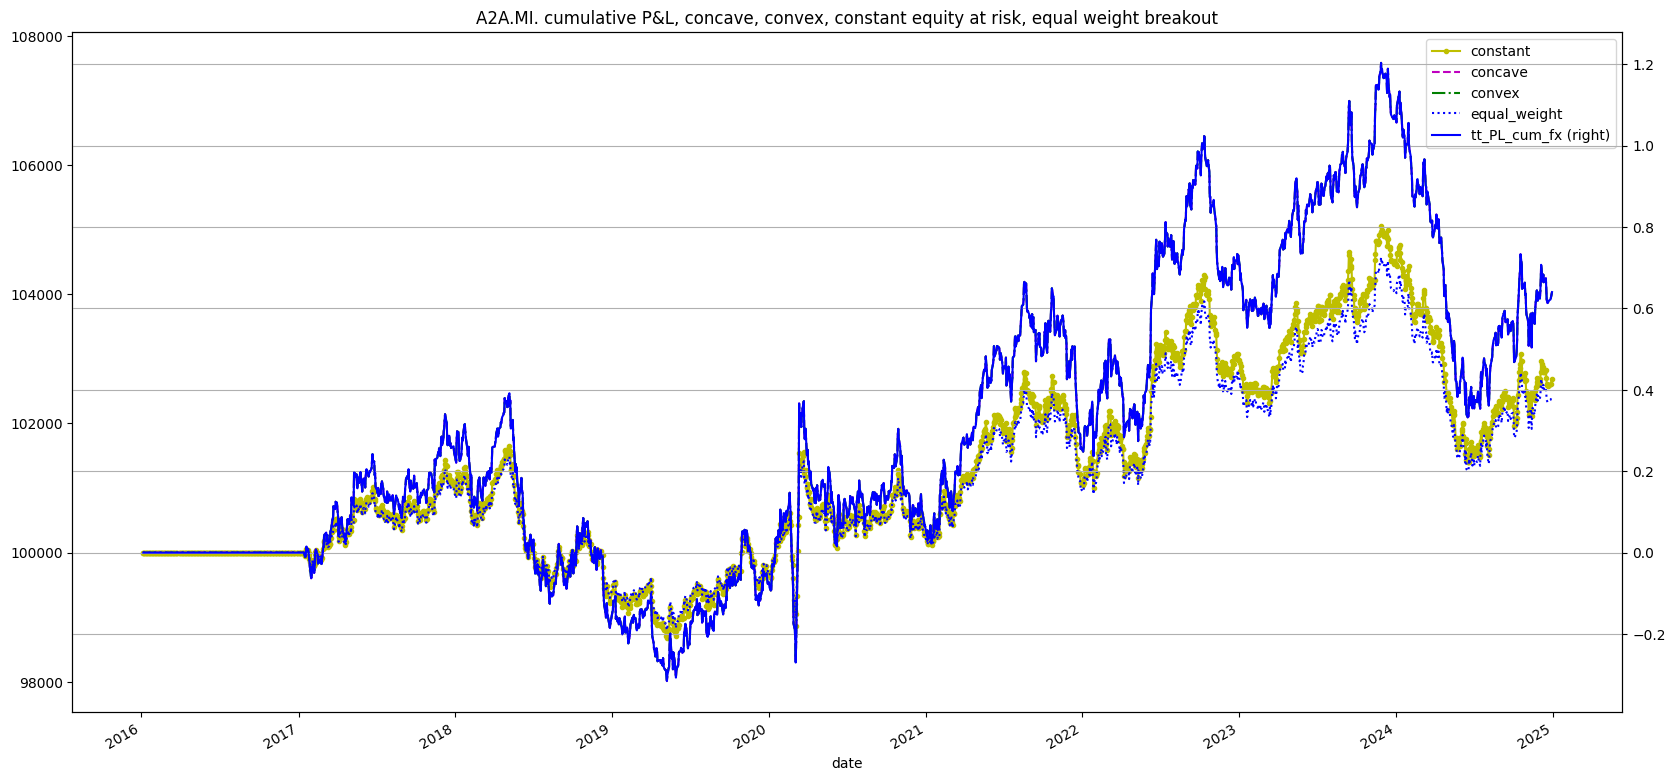

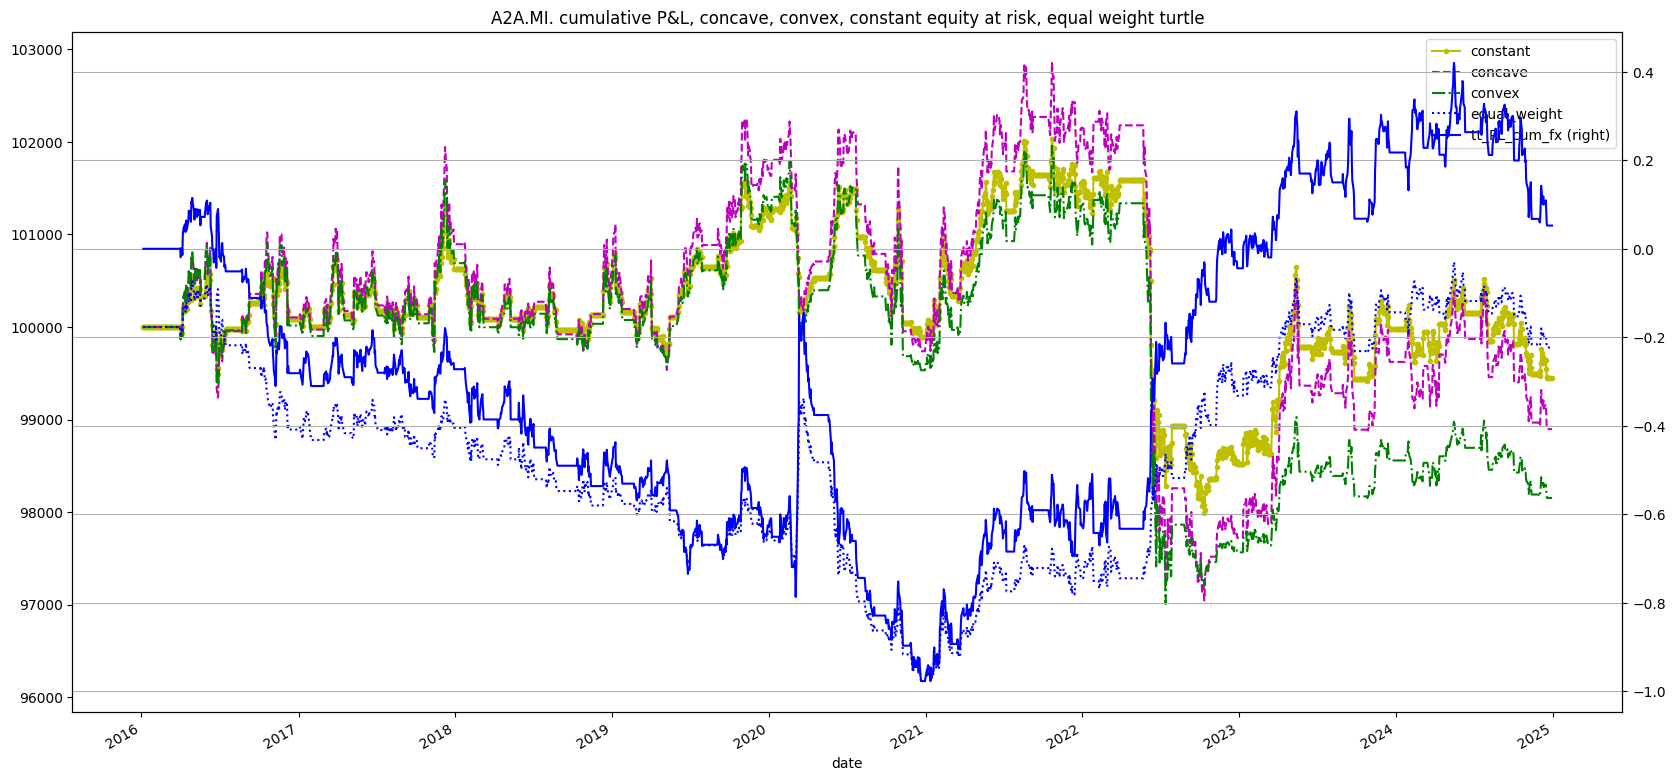

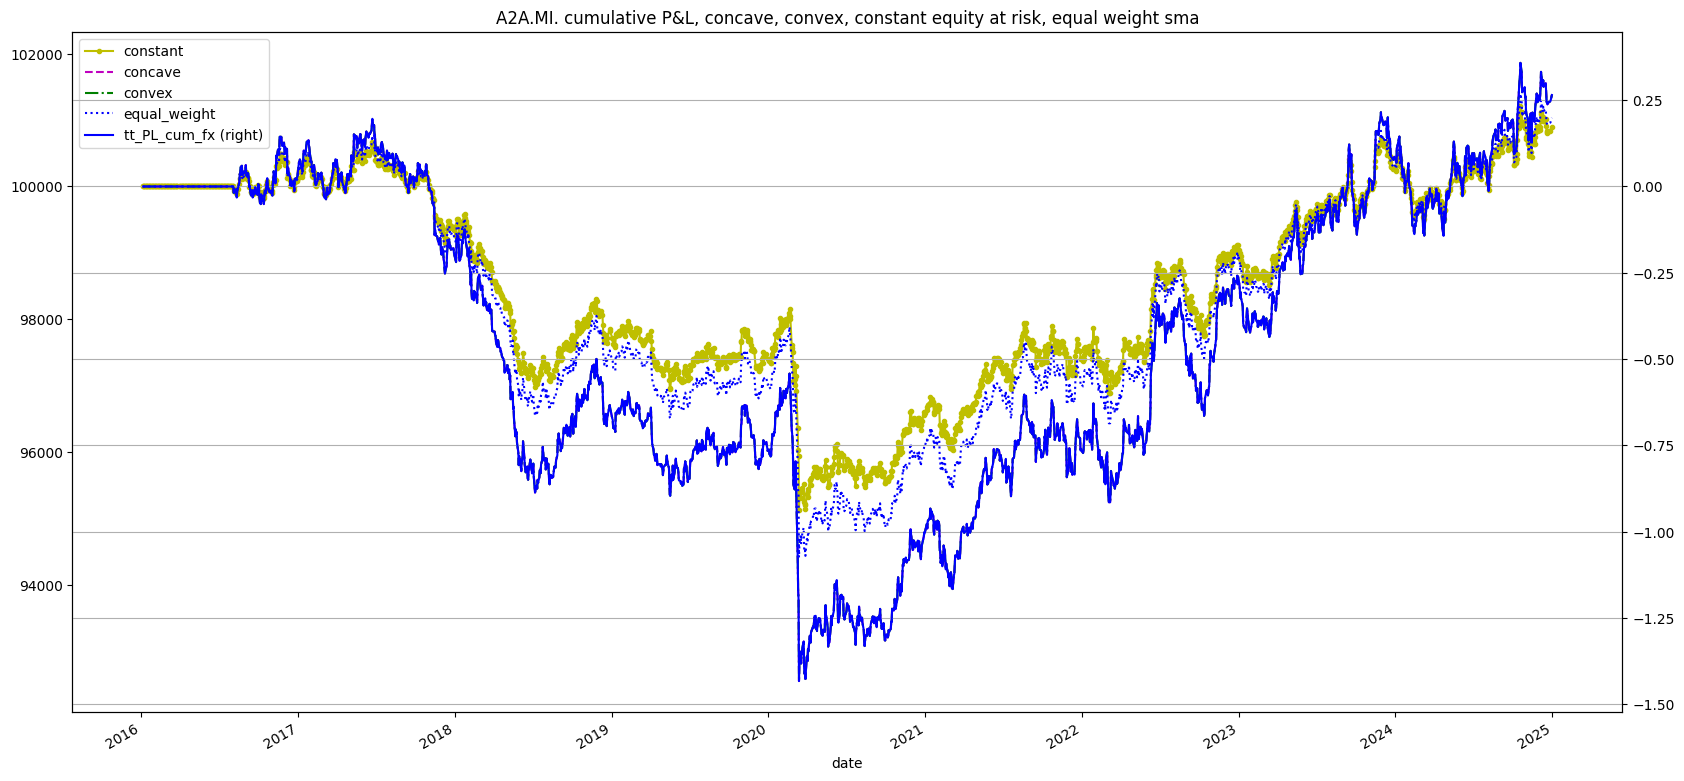

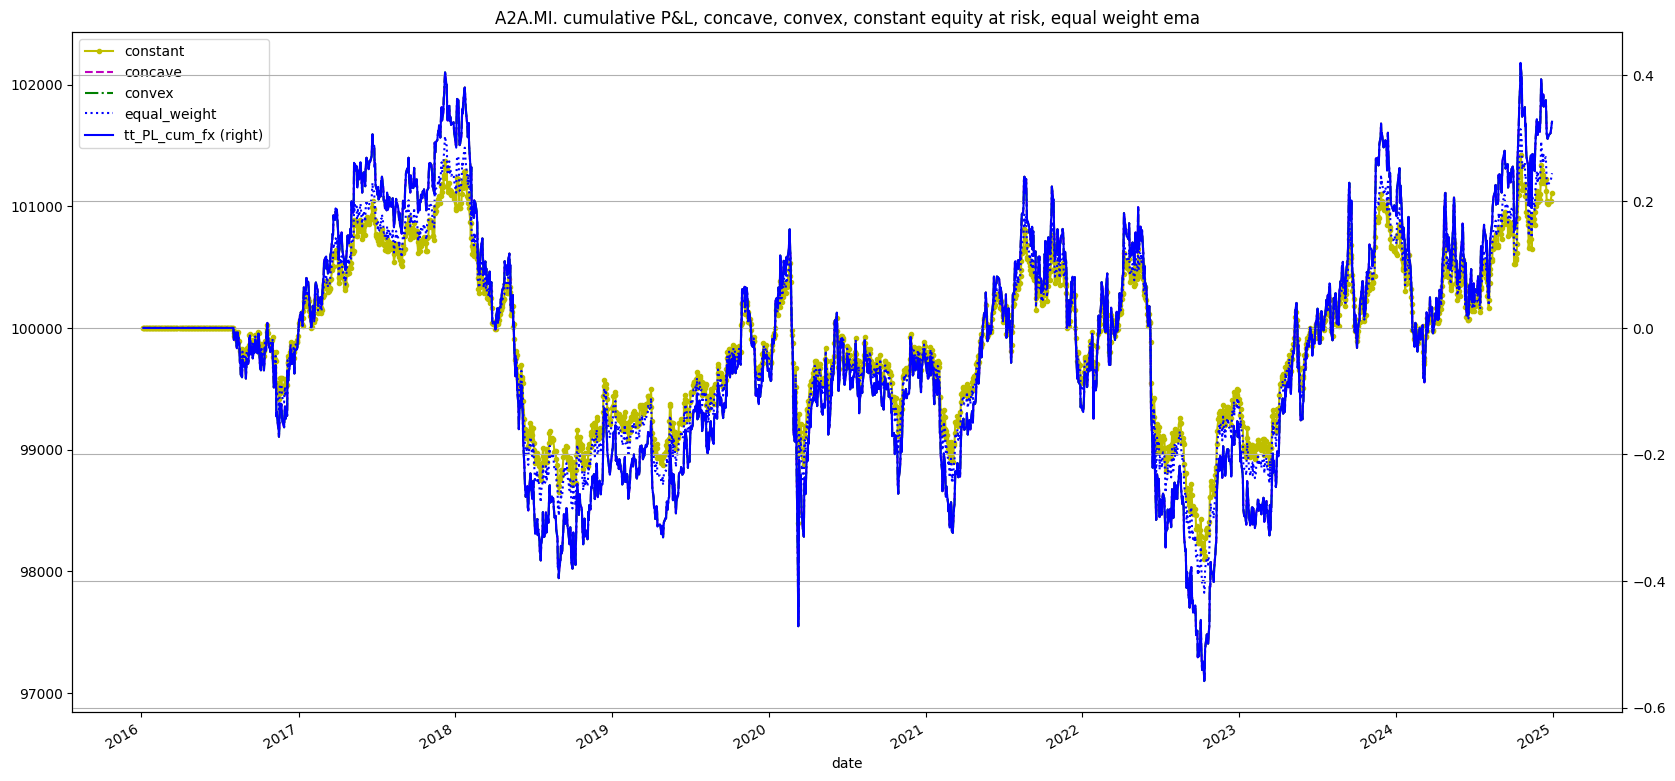

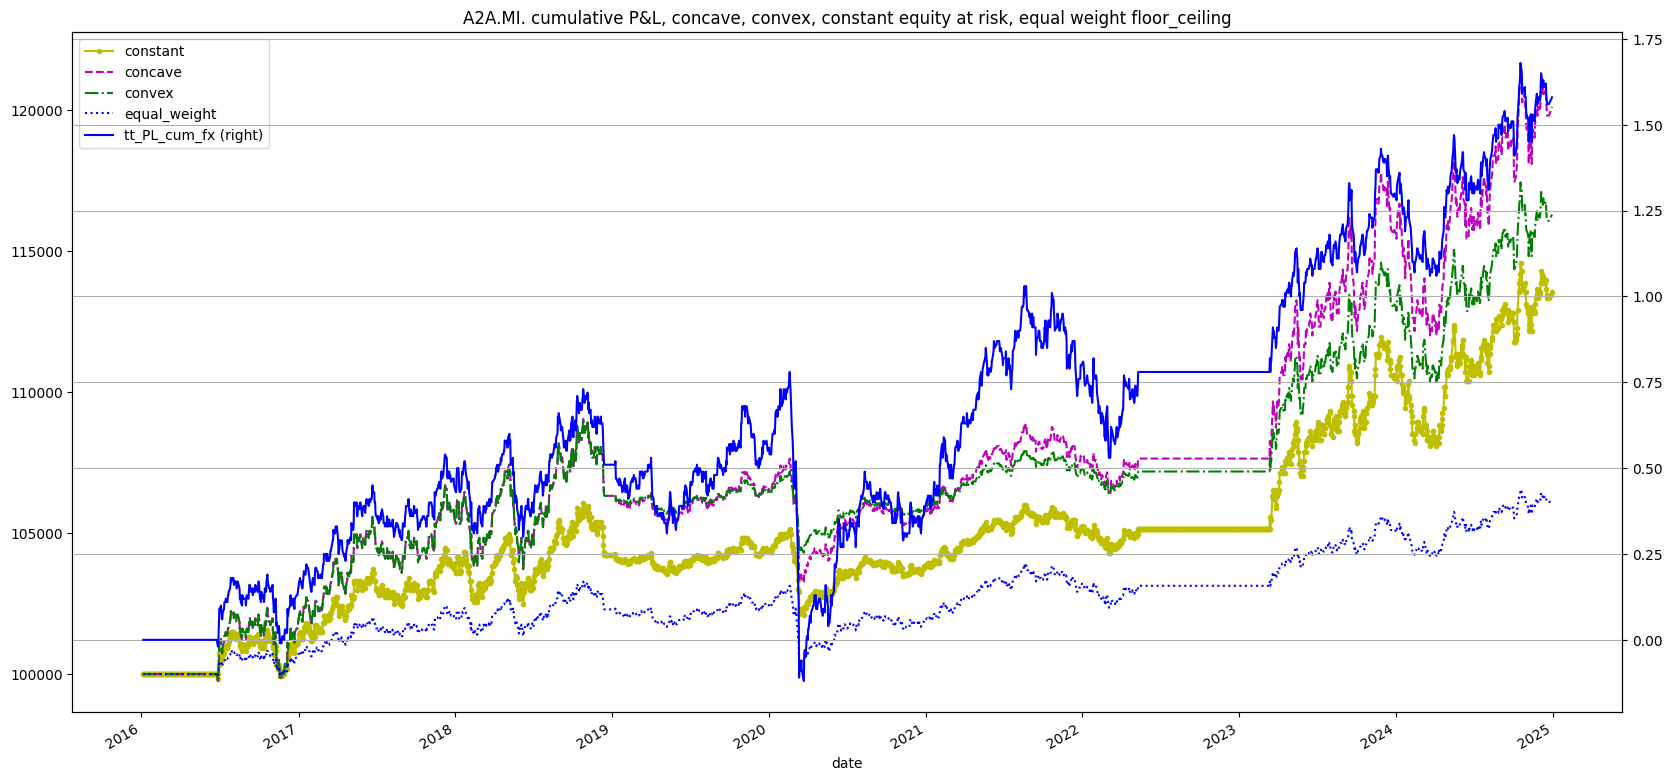

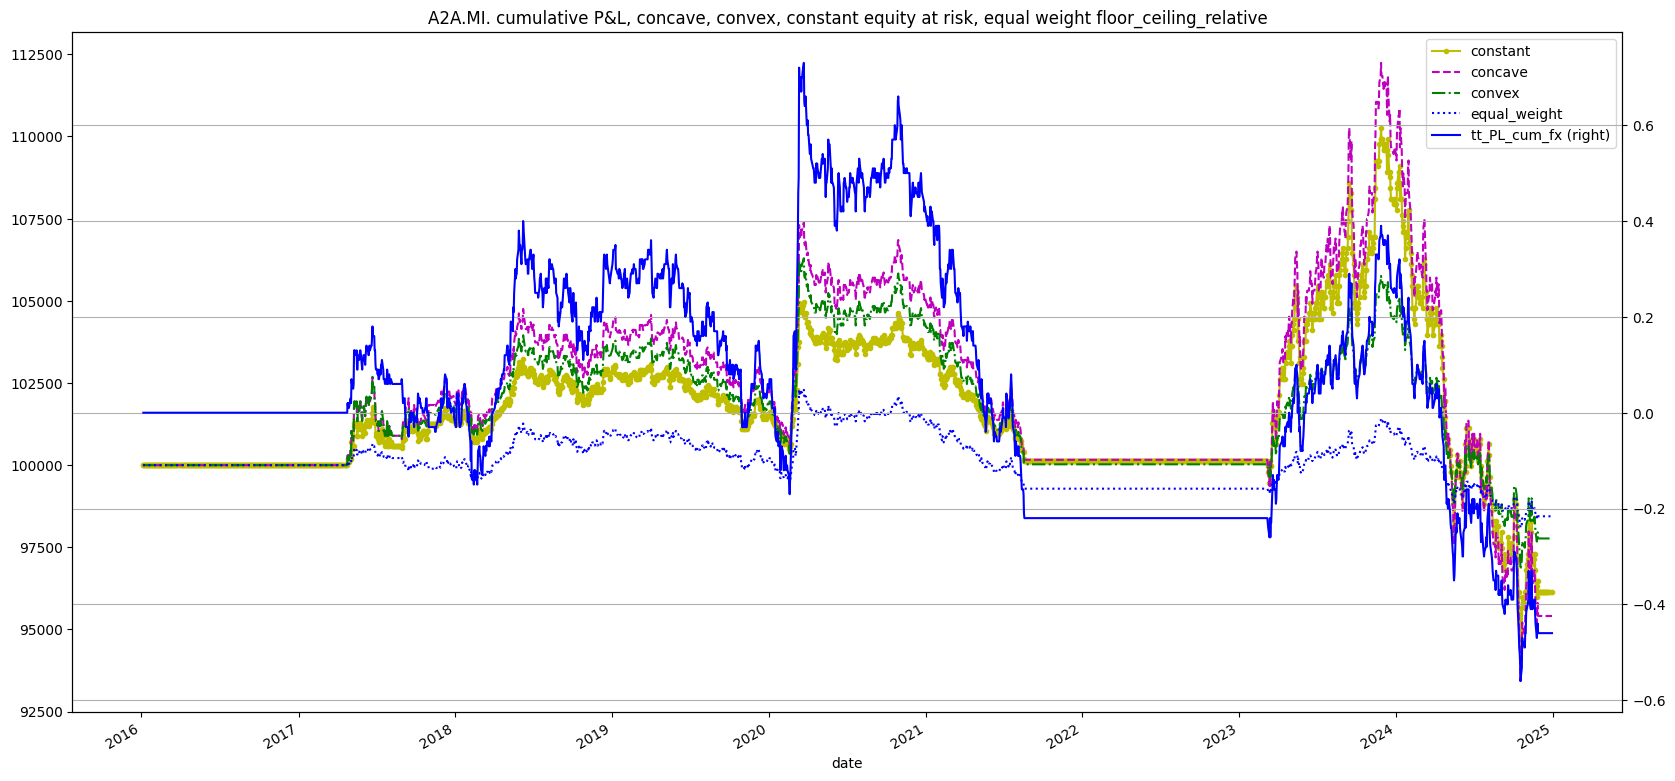

In [24]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [25]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                -2300.0   4200.0   6300.0   6300.0
ema                     -2300.0   3400.0   5200.0   5200.0
floor_ceiling           -2400.0  10500.0  15600.0  11400.0
floor_ceiling_relative  -2300.0  16600.0  19800.0   9400.0
sma                     -2300.0   3400.0   5200.0   5200.0
turtle                  -2300.0   3500.0   4700.0   2500.0

In [26]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rt', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1',
       'rh2', 'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg',
       'rrg_ch'],
      dtype='object')

In [27]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date   clg
1431 2021-08-20 07:00:00  1.96

In [28]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
1725 2022-10-13 07:00:00  0.94

In [29]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date   hi3
2239 2024-10-18 07:00:00  2.25

In [30]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date  lo3
2252 2024-11-06 08:00:00  2.0

In [31]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [32]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [33]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2283    0.037460
2284    0.037302
2285    0.037302
2286    0.037460
2287    0.037302
Length: 2288, dtype: float64

In [34]:
df_fc.tail()

date    volume  high   low  open  close  adj_close  \
2283 2024-12-19 08:00:00  10100958  2.12  2.10  2.10   2.12       2.12   
2284 2024-12-20 08:00:00   9908356  2.12  2.09  2.10   2.12       2.12   
2285 2024-12-23 08:00:00   4308555  2.14  2.11  2.11   2.12       2.12   
2286 2024-12-27 08:00:00   3288664  2.13  2.10  2.12   2.13       2.13   
2287 2024-12-30 16:35:16   4199469  2.15  2.12  2.12   2.14       2.14   

      ticker  ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  \
2283  A2A.MI   1.29   1.30  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   
2284  A2A.MI   1.29   1.30  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   
2285  A2A.MI   1.30   1.31  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   
2286  A2A.MI   1.29   1.29  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   
2287  A2A.MI   1.29   1.31  ...  NaN  NaN  NaN  NaN  NaN  NaN  0.0   NaN   

      rclg  rrg_ch  
2283   NaN    1.34  
2284   NaN    1.34  
2285   NaN    1.34  
2286   NaN    1.34  
2287   NaN    1.34  

[5 rows x 38 columns]

In [35]:
df_fc['peak_eqty'] =df_fc['close'].cummax()